<a href="https://colab.research.google.com/github/MLValadares/98345-course-uge/blob/main/PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
import numpy.linalg as la
import plotly.express as px
import matplotlib.pyplot as plt
import sklearn.linear_model
%matplotlib inline
import os

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/course-uge

/content/drive/MyDrive/Colab Notebooks/course-uge


In [ ]:
if not os.path.exists("data/FD_INDCVI_2019.csv"):
    !cd data && wget https://www.insee.fr/fr/statistiques/fichier/6544333/RP2019_INDCVI_csv.zip
    !cd data && unzip RP2019_INDCVI_csv.zip
    !cd data && rm RP2019_INDCVI_csv.zip

In [ ]:
columns = {
    "IRIS": str,
    "IPONDI": float,

    "AGED": int,
    "CS1": int

}

df_census = pd.read_csv("data/FD_INDCVI_2019.csv", sep = ";", dtype = columns, usecols = columns.keys())

# df_census = pd.read_csv('data/FD_INDCVIZA_2019.csv', sep = ";")


df_census.head()

,AGED,CS1,IPONDI,IRIS
0,68,7,3.324481,010040101
1,33,6,2.957422,010040202
2,1,8,2.957422,010040202
3,30,6,2.957422,010040202
4,72,7,5.046771,ZZZZZZZZZ


In [ ]:
# DF com data do Census (ver o CSP)
df_census = df_census.rename(columns = {
    "IRIS": "iris_id",
    "IPONDI": "weight",

    "AGED": "age",
    "CS1": "csp"
})

df_census.head()

,age,csp,weight,iris_id
0,68,7,3.324481,010040101
1,33,6,2.957422,010040202
2,1,8,2.957422,010040202
3,30,6,2.957422,010040202
4,72,7,5.046771,ZZZZZZZZZ


In [ ]:
df_census["department_id"] = df_census["iris_id"].str[:2]
df_census["municipality_id"] = df_census["iris_id"].str[:5]

In [ ]:
# Department: Nord 59
df_census = df_census[df_census["municipality_id"].str.startswith("59")]

# 1

## 1.1

In [ ]:
df_census

,age,csp,weight,iris_id,department_id,municipality_id
8925420,1,8,1.244308,590080102,59,59008
8925421,26,8,1.244308,590080102,59,59008
8925422,2,8,1.244308,590080102,59,59008
8925423,56,8,5.116984,592760102,59,59276
8925424,23,6,2.708586,590080102,59,59008
...,...,...,...,...,...,...
9702545,62,8,5.000004,595990901,59,59599
9702546,91,7,5.000004,595990901,59,59599
9702547,43,8,5.000004,595991201,59,59599
9702548,22,8,5.000004,595991201,59,59599


In [ ]:
# How many person observations are included in the census?
len(df_census)

630499

In [ ]:
# How many peploe live in the department?
df_census["weight"].sum()

1871889.648670449

In [ ]:
# How many municipalities are there in the department?
len(df_census["municipality_id"].unique())

112

In [ ]:
# Prepare a map that shows where the department is located inside of France.
if not os.path.exists("data/CONTOURS-IRIS.shp"):
    !cd data && wget https://data.geopf.fr/telechargement/download/CONTOURS-IRIS/CONTOURS-IRIS_2-1__SHP__FRA_2021-01-01/CONTOURS-IRIS_2-1__SHP__FRA_2021-01-01.7z
    !cd data && 7z x CONTOURS-IRIS_2-1__SHP__FRA_2021-01-01.7z -y
    !cd data && cp CONTOURS-IRIS_2-1__SHP__FRA_2021-01-01/CONTOURS-IRIS/1_DONNEES_LIVRAISON_2021-06-00217/CONTOURS-IRIS_2-1_SHP_LAMB93_FXX-2021/CONTOURS-IRIS.* .
    !cd data && rm CONTOURS-IRIS_2-1__SHP__FRA_2021-01-01.7z

In [ ]:
# DF com goematry por IRIS id
df_iris = gpd.read_file("data/CONTOURS-IRIS.shp")
df_iris = df_iris.rename(columns = {
    "INSEE_COM": "municipality_id",
    "CODE_IRIS": "iris_id",
})[["iris_id", "municipality_id", "geometry"]]

In [ ]:
df_iris_59 = df_iris[df_iris["municipality_id"].str.startswith("59")]
df_iris_not_59 = df_iris[~df_iris["municipality_id"].str.startswith("59")]
df_iris_59.head()

df_iris_59_dissolved = df_iris_59.dissolve()
df_iris_not_59_dissolved = df_iris_not_59.dissolve()

In [ ]:
df_municipalities = df_iris_59.dissolve(by="municipality_id")
df_municipalities

,geometry,iris_id
municipality_id,,
59001,"POLYGON ((716637.6 7015968.5, 716638.9 7015945...",590010000
59002,"POLYGON ((722037.1 7024286.7, 721939.7 7024193...",590020000
59003,"POLYGON ((775835.4 7013891.3, 775825.7 7013914...",590030000
59004,"POLYGON ((723362.9 7045729.1, 723364.8 7045722...",590040000
59005,"POLYGON ((696481.4 7051180, 696510.1 7051106.7...",590050000
...,...,...
59666,"POLYGON ((657129.4 7084560.2, 657052.6 7084727...",596660000
59667,"POLYGON ((663006.2 7081905.2, 663008.1 7081900...",596670000
59668,"POLYGON ((665080.1 7107281.1, 664781.7 7107235...",596680000


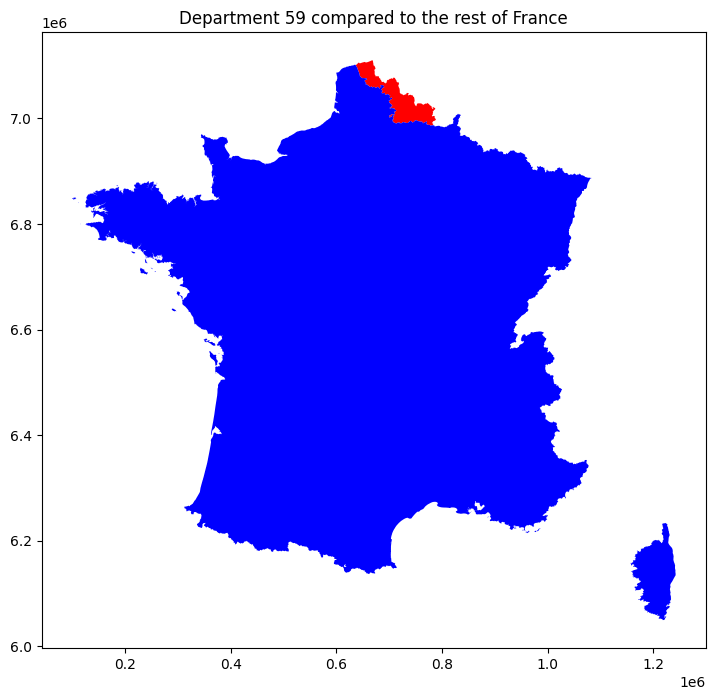

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

# Plot data where municipality_id starts with "59"
df_iris_59_dissolved.plot(ax=ax, color="red", label="Municipality ID starts with 59")

# Plot other data
df_iris_not_59_dissolved.plot(ax=ax, color="blue", label="Other")

# Add title
ax.set_title("Department 59 compared to the rest of France")

plt.show()
# df_iris.head()

## 1.2

In [ ]:
df_age = df_census.groupby("age").size().reset_index(name = "count")
# df_age

In [ ]:
# Plot the age distribution of the persons living in the department.
# px.bar(df_age_weighted, x = "age", y = "weighted")

# Talvez falar sobre demografic pyramid

In [ ]:
# df_age_weighted

In [ ]:
df_age_weighted = df_census.groupby("age")["weight"].sum().reset_index(name = "weighted")
df_comparison = pd.merge(df_age, df_age_weighted, on = "age")
px.bar(df_comparison, x = "age", y = ["count", "weighted"], barmode = "group")

In [ ]:
# Indicate the average age of persons living in the territory
(df_age_weighted['age'] * df_age_weighted['weighted']).sum() / df_age_weighted['weighted'].sum()

39.159544816325365

In [ ]:
df_age_weighted

,age,weighted
0,0,1093.746433
1,1,23074.632132
2,2,23001.592152
3,3,24101.006783
4,4,24416.695219
...,...,...
109,109,20.154975
110,110,3.320091
111,111,1.052230
112,114,3.065939


In [ ]:
# Make a map of the municipalities in the study area and indicate the average age of their population.
# df_59_municipalities_age = pd.merge(df_iris_59,
#               df_census, on = "municipality_id")
# df_59_municipalities_age = df_59_municipalities_age.groupby("municipality_id").

df = df_census.groupby(["municipality_id" ,"age"])
df= df["weight"].sum().reset_index(name = "weighted")

df
# df_census.groupby(["municipality_id", "age"]).head()
# average(weights = "weight")

# df_59_municipalities_age.head()
# df_iris_59.groupby("municipality_id")["age"].mean()

# Which municipality is the youngest, which one is the oldest?

,municipality_id,age,weighted
0,59008,0,2.708586
1,59008,1,122.501461
2,59008,2,153.037294
3,59008,3,169.688744
4,59008,4,137.571056
...,...,...,...
11000,59663,94,10.099400
11001,59663,95,20.078445
11002,59663,96,5.000185
11003,59663,97,5.000185


<ipython-input-74-b951e9da25a0>:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



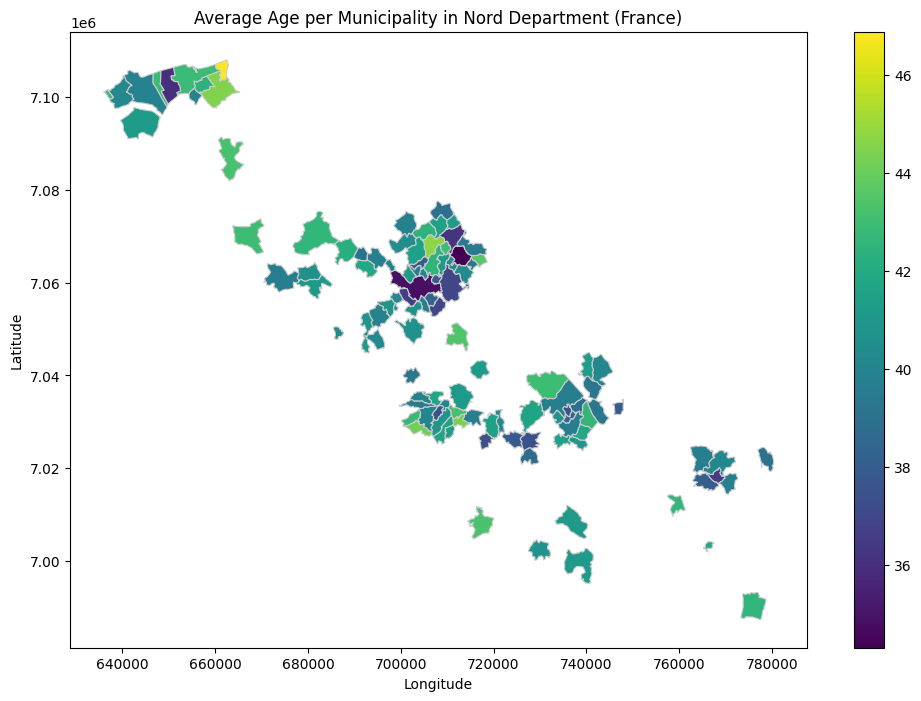

Youngest municipality: 59512 (Average age: 34.31)
Oldest municipality: 59340 (Average age: 46.89)


In [ ]:
# Calculate the average age for each municipality
df_avg_age = df.groupby("municipality_id").apply(lambda x: (x["age"] * x["weighted"]).sum() / x["weighted"].sum()).reset_index(name="avg_age")

# Merge the average age data with the municipality geometry data
df_map = pd.merge(df_municipalities, df_avg_age, on="municipality_id")

# Convert the merged data to a GeoDataFrame
gdf_map = gpd.GeoDataFrame(df_map, geometry="geometry")


# Create the map
fig, ax = plt.subplots(figsize=(12, 8))
gdf_map.plot(column="avg_age", cmap="viridis", linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add title and labels
plt.title("Average Age per Municipality in Nord Department (France)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")


plt.show()

# Find the youngest and oldest municipalities
youngest_municipality = gdf_map.loc[gdf_map["avg_age"].idxmin()]
oldest_municipality = gdf_map.loc[gdf_map["avg_age"].idxmax()]

print(f"Youngest municipality: {youngest_municipality['municipality_id']} (Average age: {youngest_municipality['avg_age']:.2f})")
print(f"Oldest municipality: {oldest_municipality['municipality_id']} (Average age: {oldest_municipality['avg_age']:.2f})")

In [ ]:
# Calculate the distribuition for each

# Calculate the distribution of socio-professional categories (CSP) for the entire department
csp_distribution_overall = df_census.groupby('csp')['weight'].sum() / df_census['weight'].sum() * 100

# Select three municipalities for comparison (replace with your desired municipalities)
escolhidas =  ["59512", "59340", "59052"]

# Calculate CSP distribution for each municipality
csp_distributions = {}
for municipality in escolhidas:
    df_municipality = df_census[df_census['municipality_id'] == municipality]
    csp_distributions[municipality] = df_municipality.groupby('csp')['weight'].sum() / df_municipality['weight'].sum() * 100

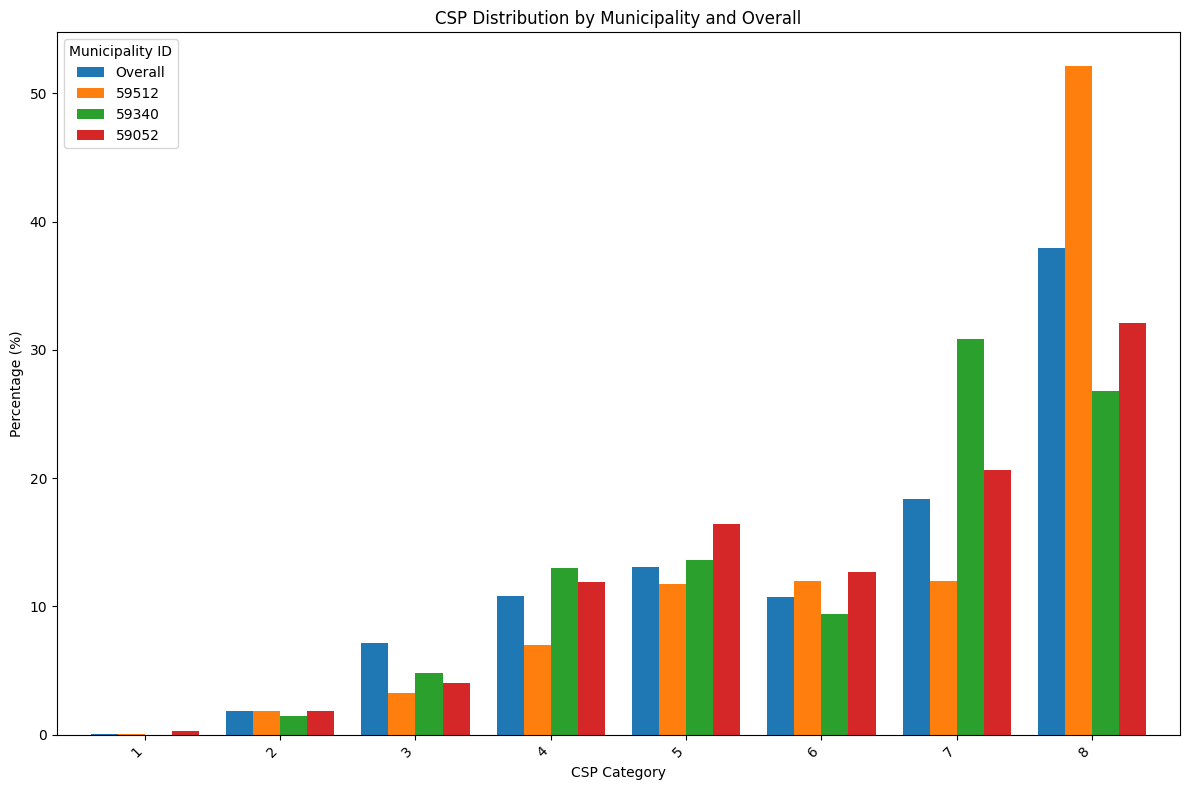

In [ ]:
# Example data preparation (you already have this in csp_distribution_overall and csp_distributions)
csp_distribution_overall = csp_distribution_overall.rename('Overall')
csp_distributions_df = pd.DataFrame(csp_distributions)

# Combine overall and individual municipality distributions
combined_df = pd.concat([csp_distribution_overall, csp_distributions_df], axis=1)

# Plotting
ax = combined_df.plot(kind='bar', figsize=(12, 8), width=0.8)
plt.title('CSP Distribution by Municipality and Overall')
plt.xlabel('CSP Category')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Municipality ID')
plt.tight_layout()

plt.show()


## 1.3

In [ ]:
# prompt: Make use of the aggregated census data [INSEE AGGREGATED] to create a bar plot indicating the number of working inhabitants in each municipality of the study area.
# Explain how you count these persons from the data.

# Count the number of working inhabitants per municipality.
# We consider as "working" individuals aged 15 to 64 years old, excluding those with a CSP code of 0 (no professional activity).
df_working_census = df_census[(df_census["age"] >= 15) & (df_census["age"] <= 64) & (df_census["csp"] != 0)]

# Group data by municipality and sum the weights to get the total number of working inhabitants
df_working_by_municipality = df_working_census.groupby("municipality_id")["weight"].sum().reset_index(name="working_population")

# Merge with geographical data
# df_map_working = pd.merge(df_iris_59, df_working_by_municipality, on="municipality_id",how='left')
# df_map_working = df_map_working.fillna(0) # fill NaN values with 0 if a municipality has no working population recorded.


# # Convert to GeoDataFrame
# gdf_working = gpd.GeoDataFrame(df_map_working, geometry="geometry")


# # Create the plot
# fig, ax = plt.subplots(1, 1, figsize=(12, 8))
# gdf_working.plot(column="working_population", cmap="viridis", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)

# # Customize the plot
# plt.title("Number of Working Inhabitants per Municipality in Nord Department")
# plt.xlabel("Longitude")
# plt.ylabel("Latitude")


# plt.show()

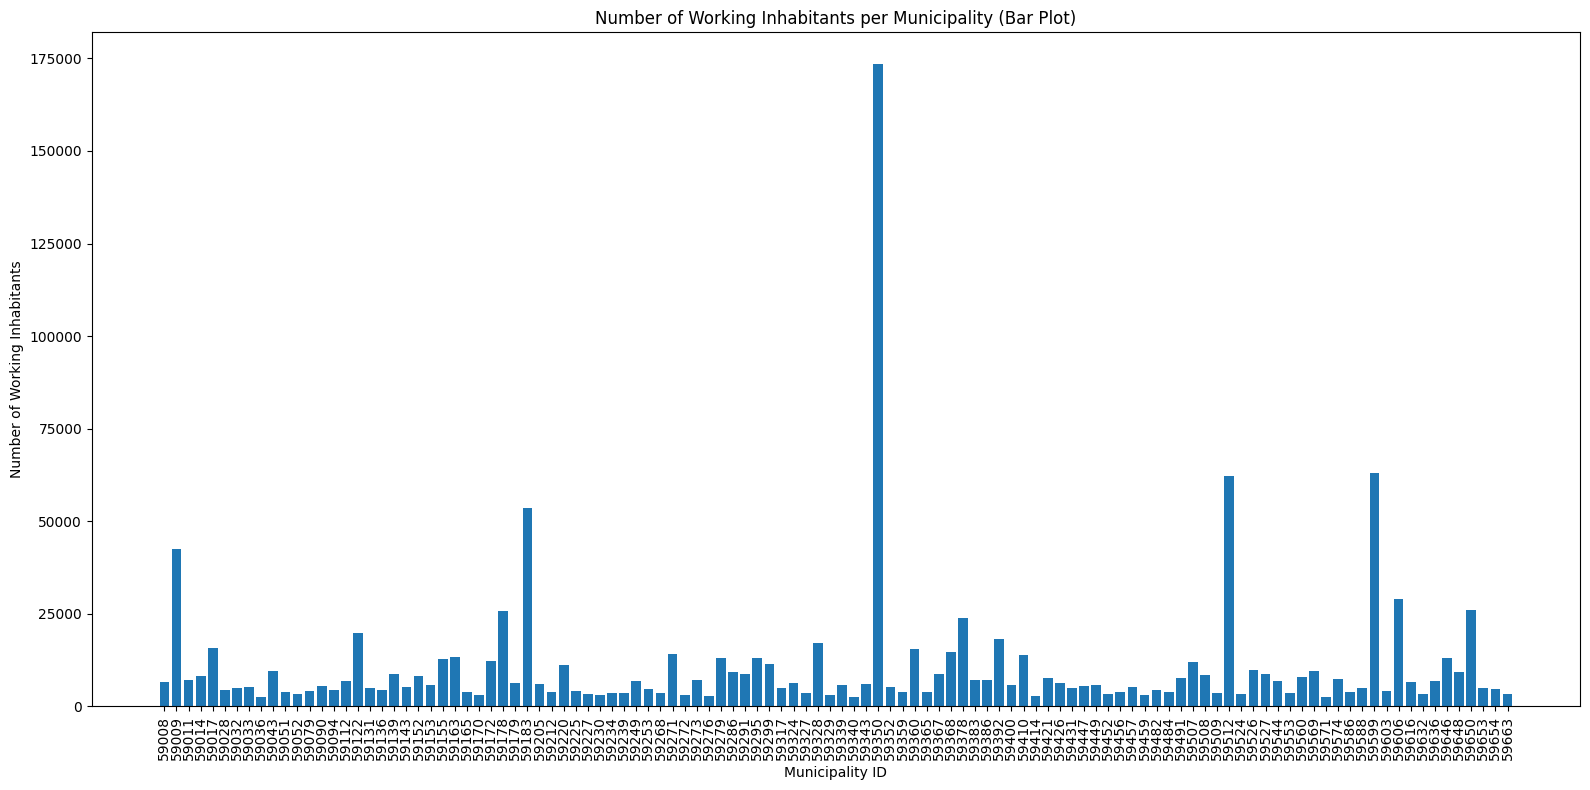

In [ ]:
# Create the bar plot
fig, ax = plt.subplots(figsize=(16, 8))  # Adjust figure size as needed
ax.bar(df_working_by_municipality["municipality_id"], df_working_by_municipality["working_population"])

# Customize the plot
ax.set_xlabel("Municipality ID")
ax.set_ylabel("Number of Working Inhabitants")
ax.set_title("Number of Working Inhabitants per Municipality (Bar Plot)")
ax.tick_params(axis='x', rotation=90) # Rotate x-axis labels

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

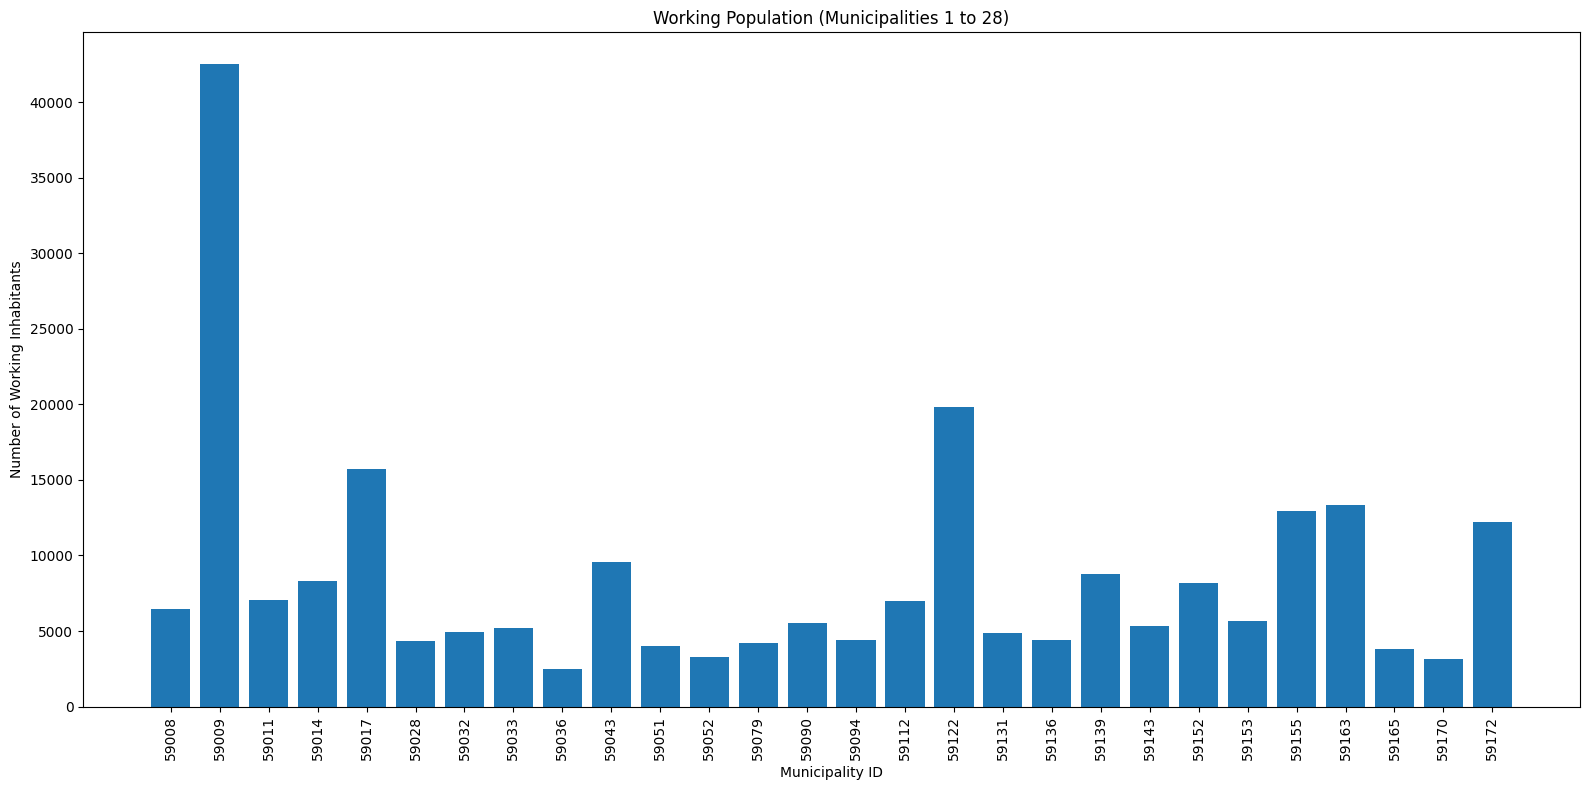

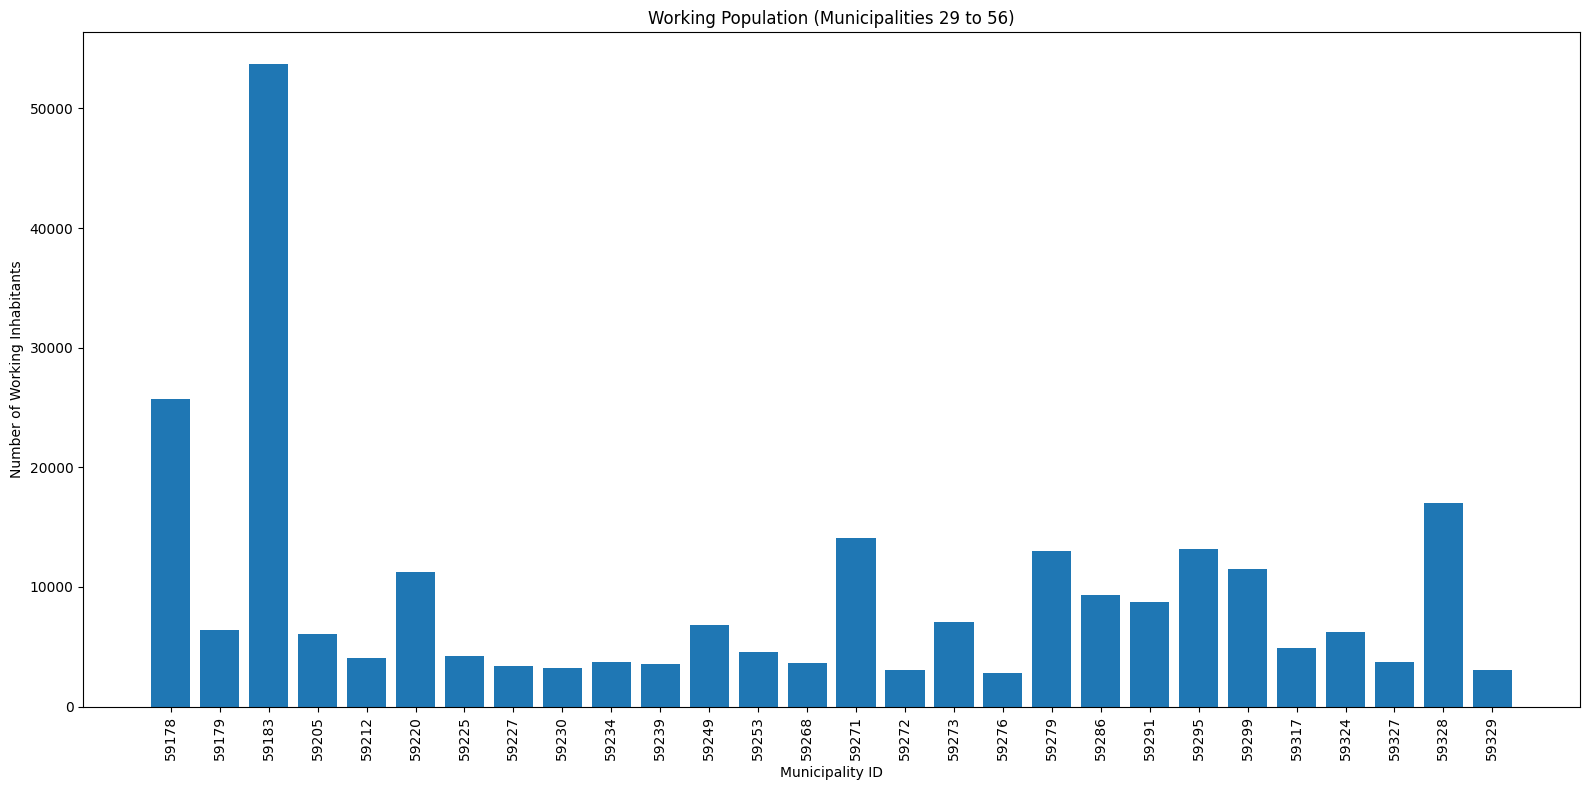

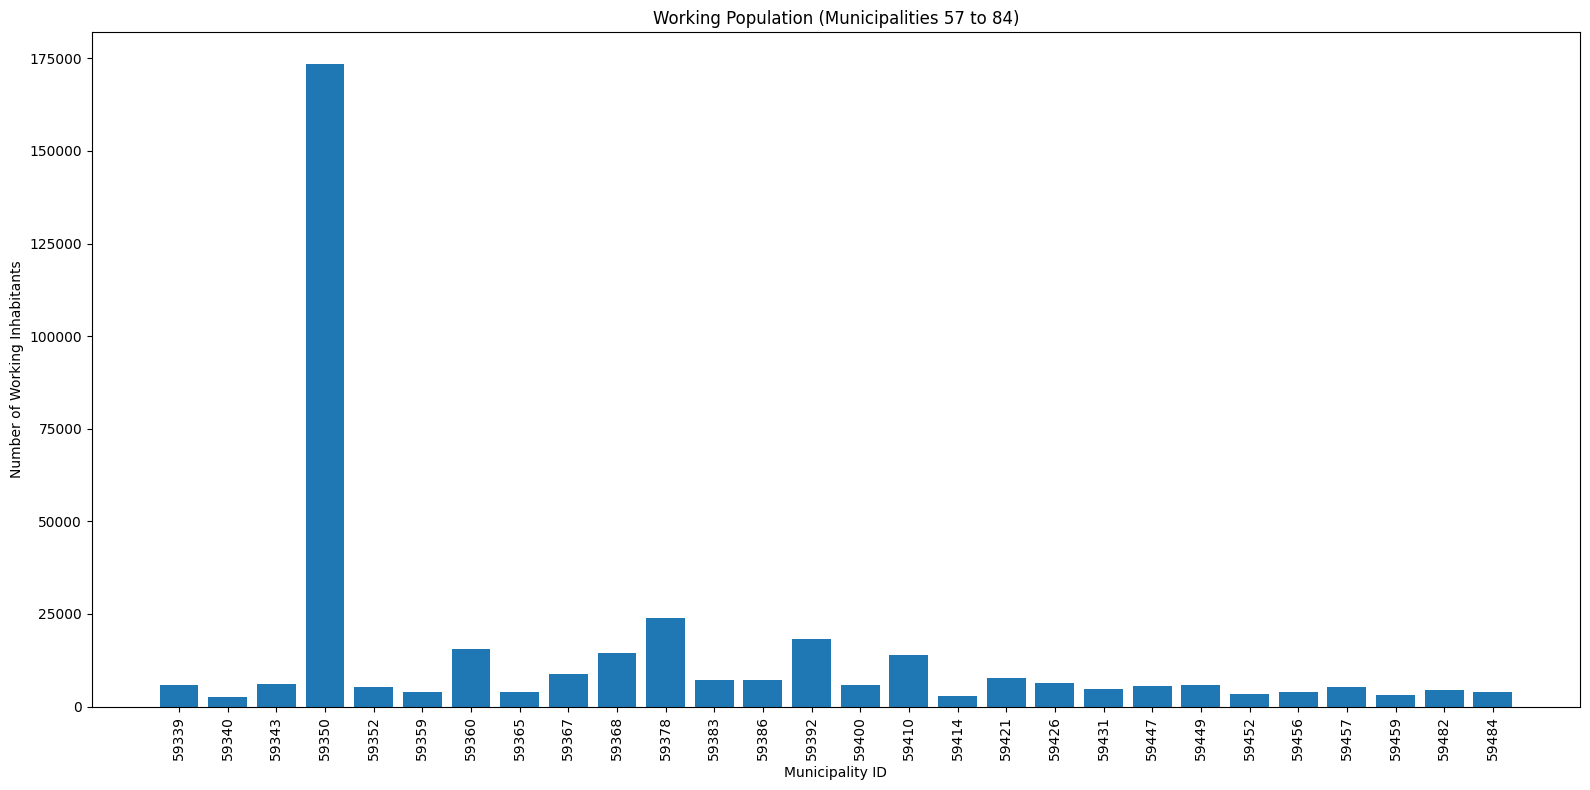

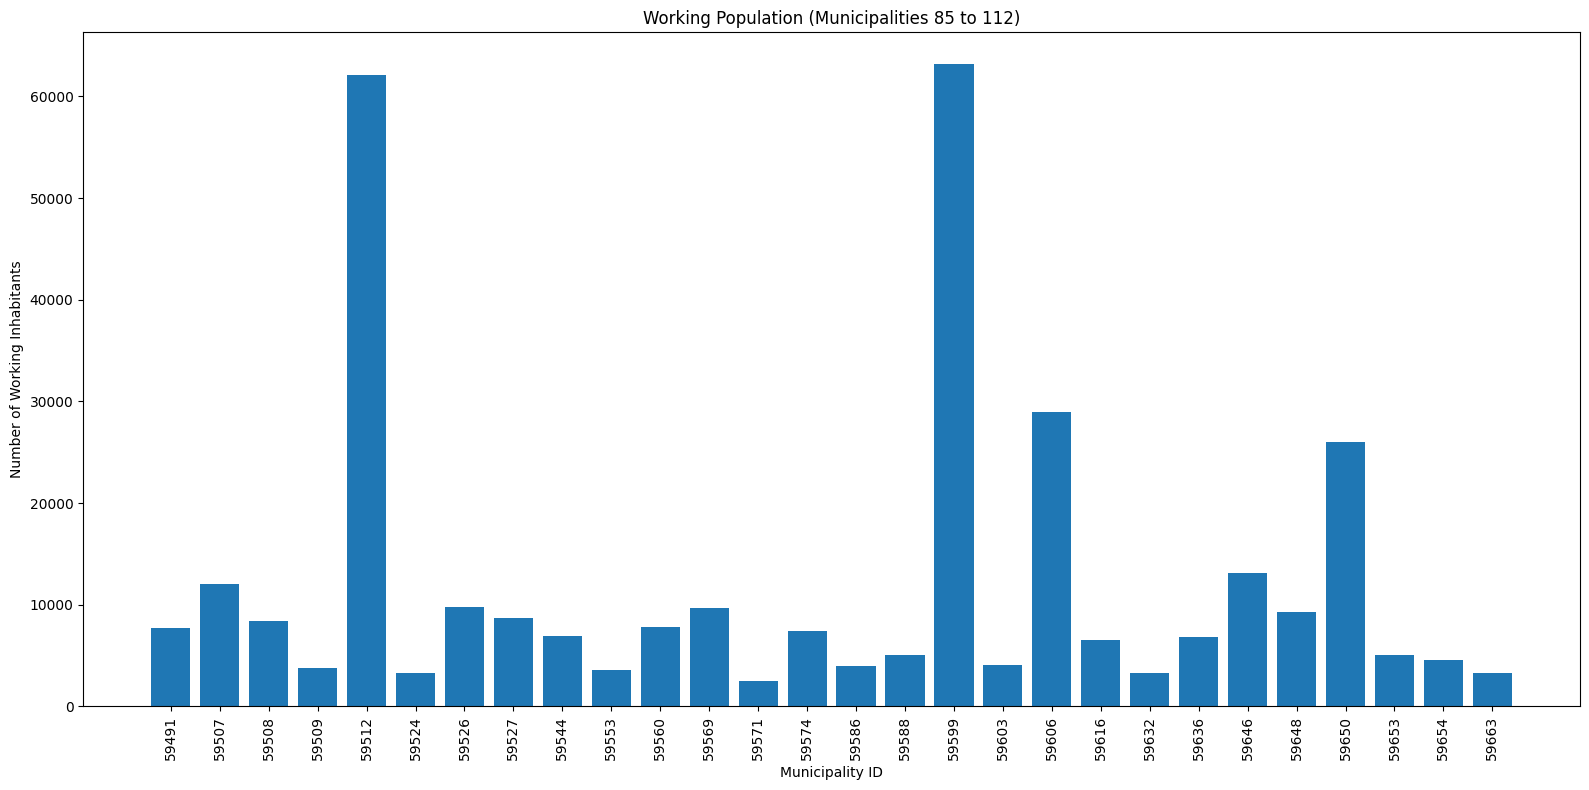

In [ ]:
import math

chunk_size = 28
total_municipalities = len(df_working_by_municipality)
num_plots = math.ceil(total_municipalities / chunk_size)

for i in range(num_plots):
    start_idx = i * chunk_size
    end_idx = start_idx + chunk_size
    subset = df_working_by_municipality.iloc[start_idx:end_idx]

    # Criar o bar plot para o subset atual
    fig, ax = plt.subplots(figsize=(16, 8))
    ax.bar(subset["municipality_id"], subset["working_population"])

    # Personalizar o plot
    ax.set_xlabel("Municipality ID")
    ax.set_ylabel("Number of Working Inhabitants")
    ax.set_title(f"Working Population (Municipalities {start_idx + 1} to {min(end_idx, total_municipalities)})")
    ax.tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

In [ ]:
# Make use of the URSSAF employment data [URSSAF] to create a bar plot indicating the number of employees in each municipality of the study area.

df_employment = pd.read_csv("data/etablissements-et-effectifs-salaries-au-niveau-commune-x-ape-last.csv", sep = ";",
    usecols = ["Code commune", "Effectifs salariés 2019"], dtype = { "Code commune": str })

df_employment = df_employment.rename(columns = {
    "Code commune": "municipality_id",
    "Effectifs salariés 2019": "employment"
})

df_employment = df_employment.groupby("municipality_id").sum().reset_index()

df_employment = df_employment[df_employment["municipality_id"].str.startswith("59")].reset_index()

df_employment

,index,municipality_id,employment
0,20877,59001,16.0
1,20878,59002,141.0
2,20879,59003,1.0
3,20880,59004,84.0
4,20881,59005,126.0
...,...,...,...
642,21519,59666,44.0
643,21520,59667,2.0
644,21521,59668,65.0
645,21522,59669,11.0


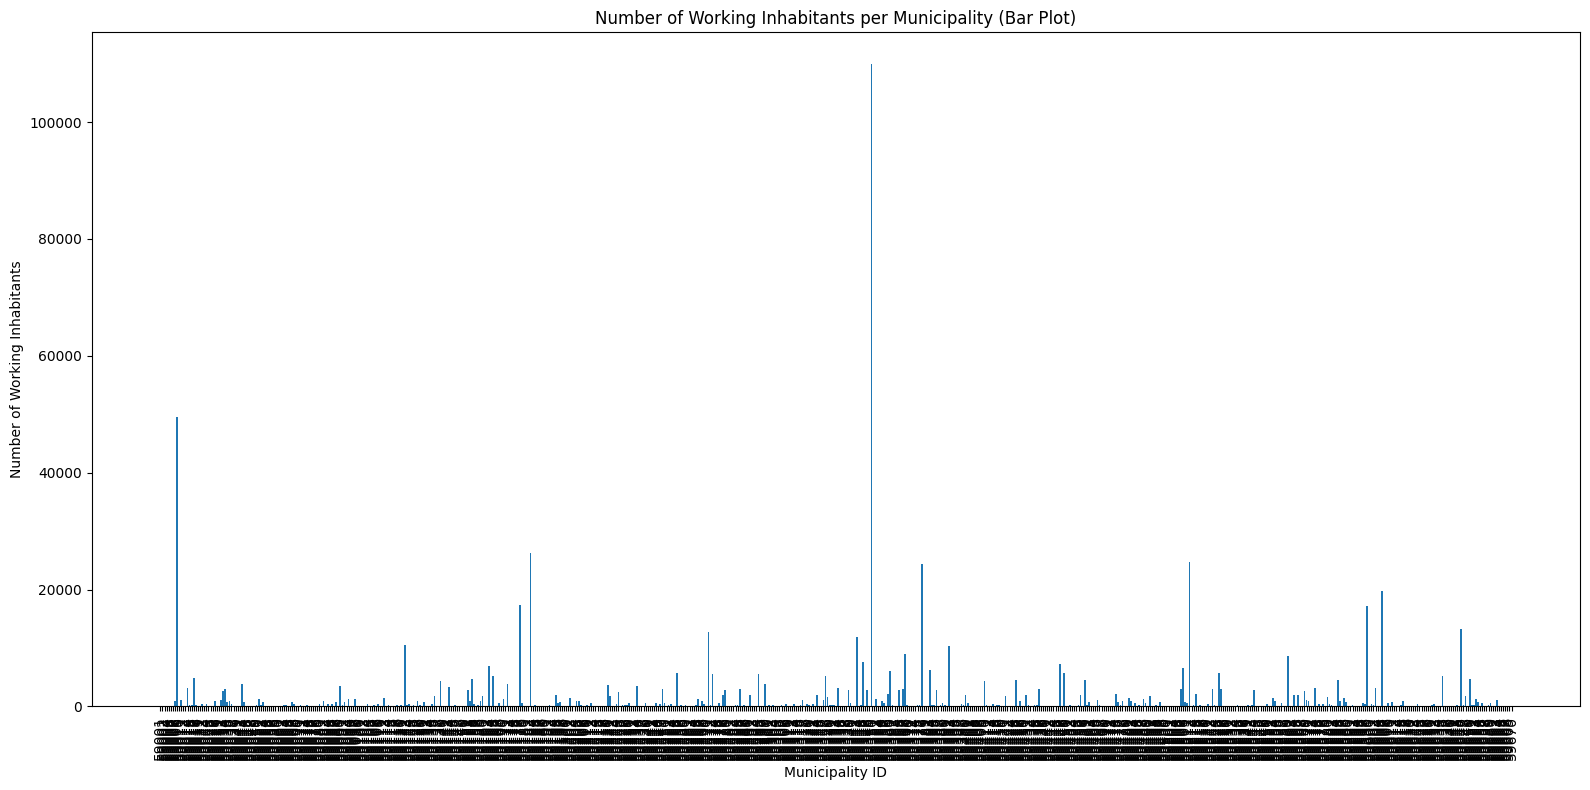

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))  # Adjust figure size as needed
ax.bar(df_employment["municipality_id"], df_employment["employment"])

# Customize the plot
ax.set_xlabel("Municipality ID")
ax.set_ylabel("Number of Working Inhabitants")
ax.set_title("Number of Working Inhabitants per Municipality (Bar Plot)")
ax.tick_params(axis='x', rotation=90) # Rotate x-axis labels

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

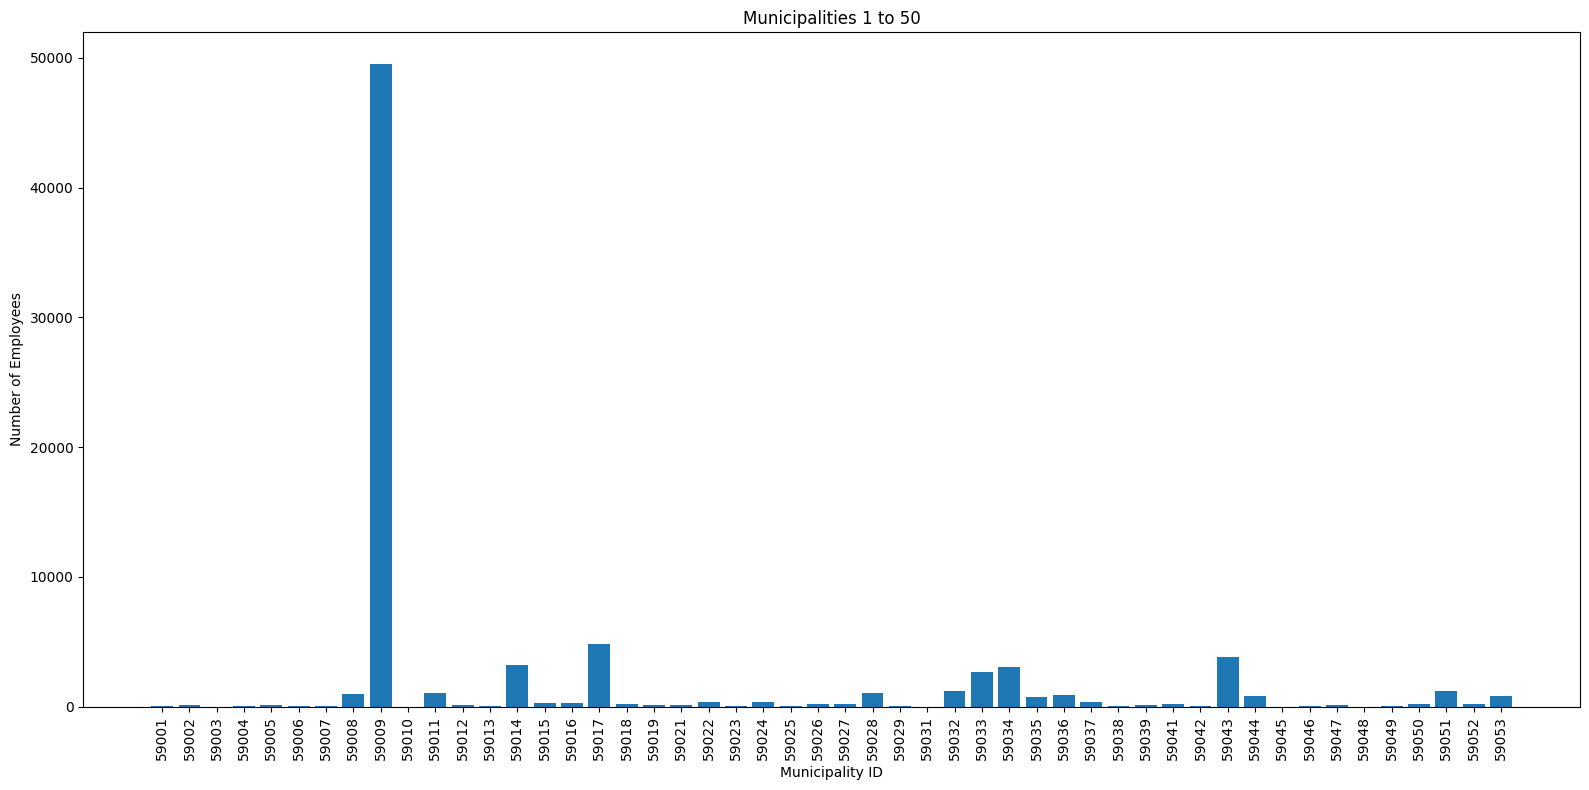

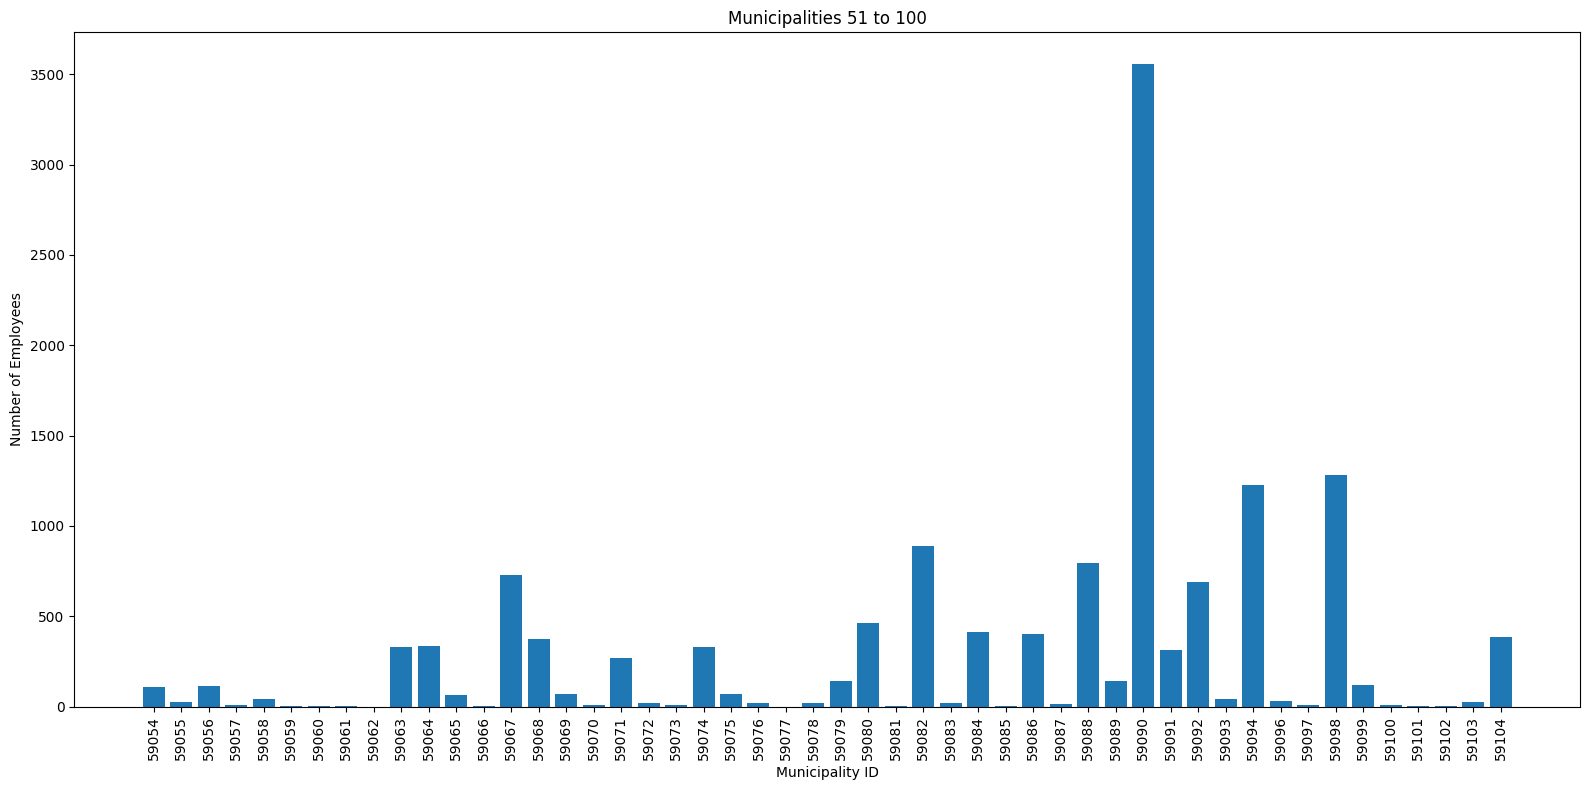

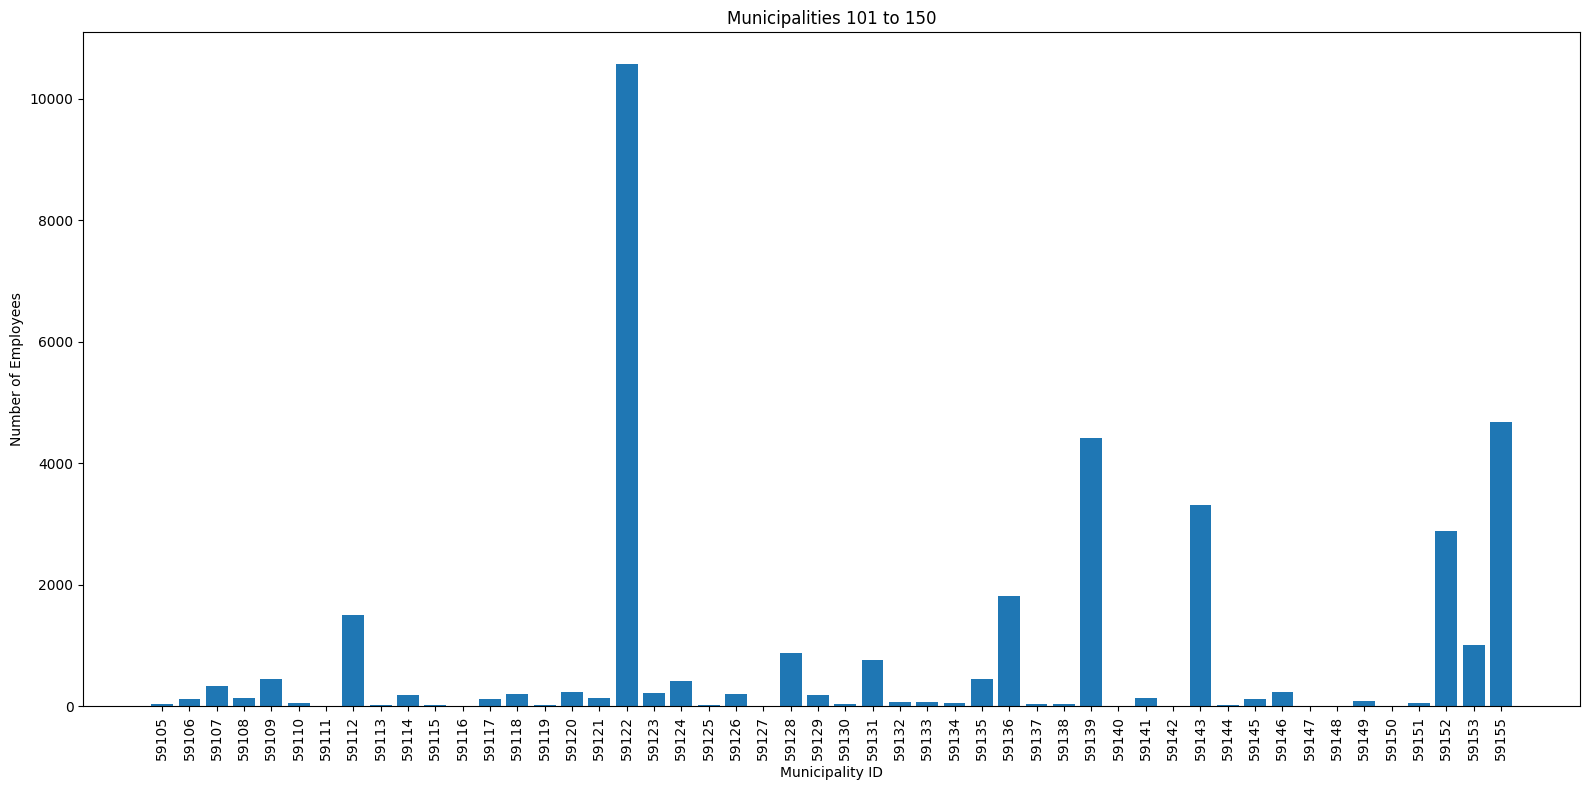

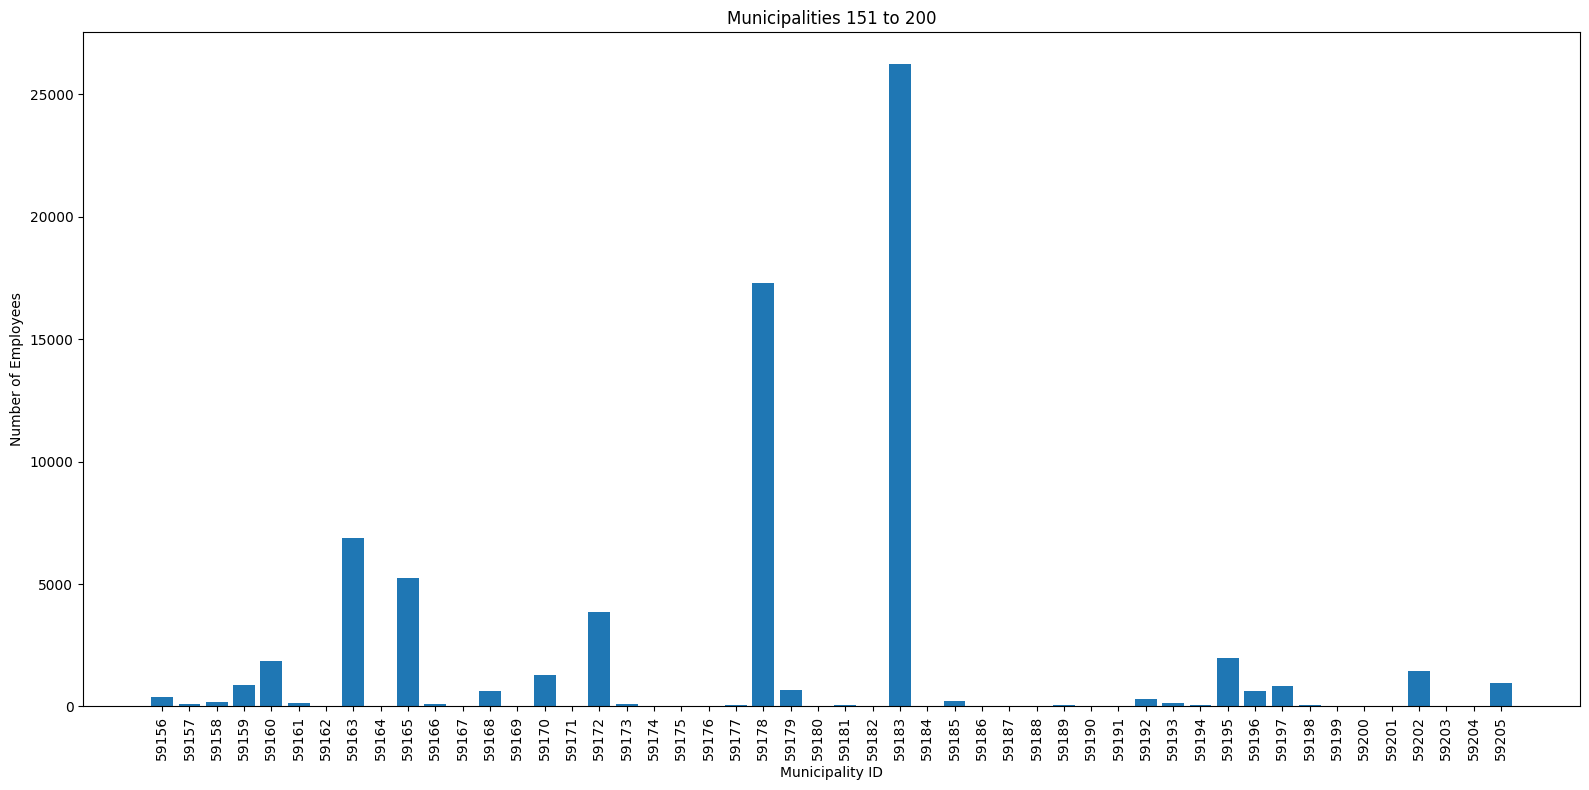

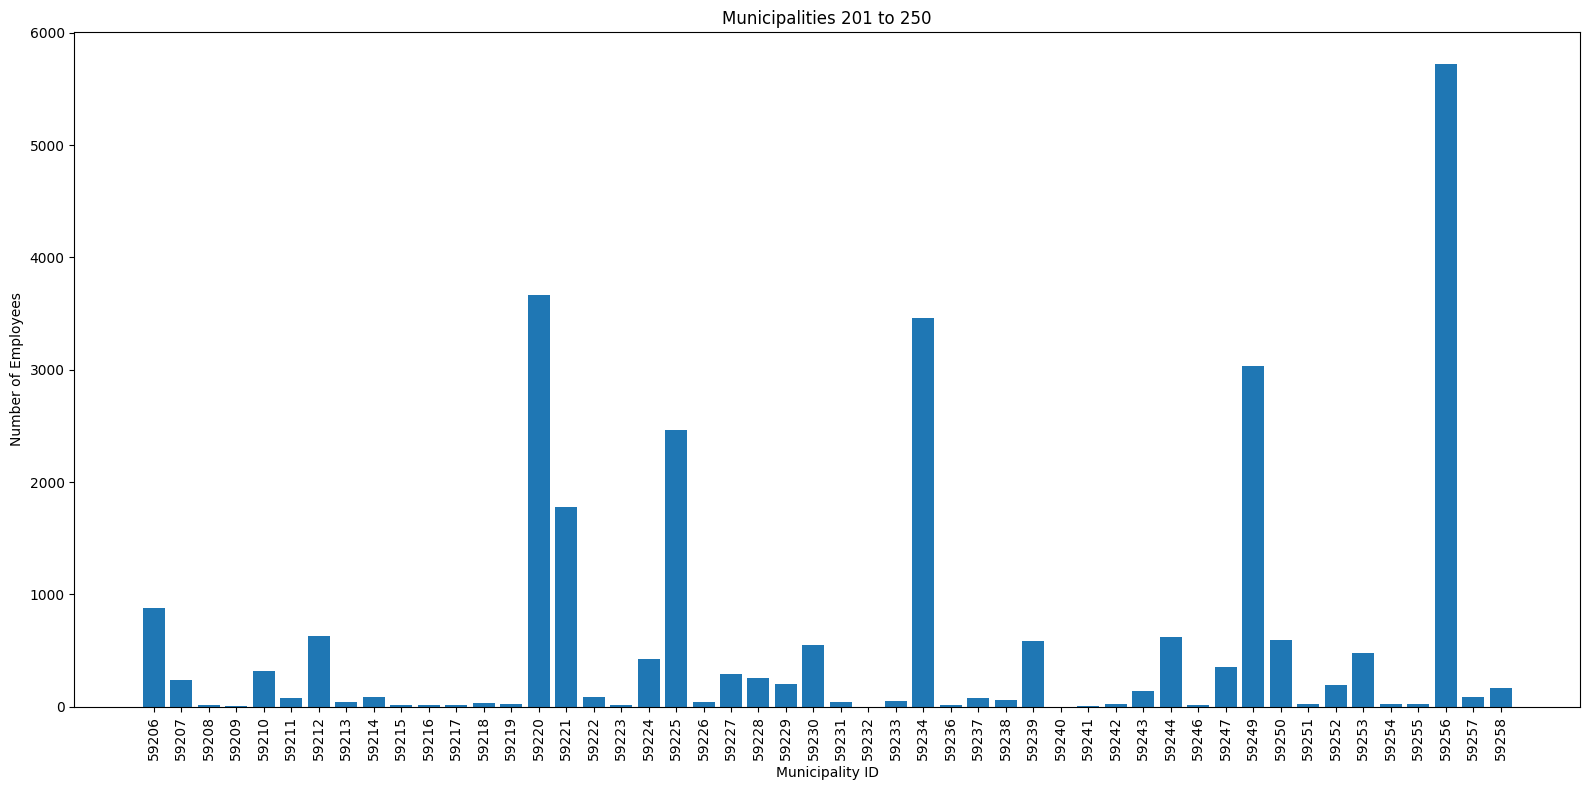

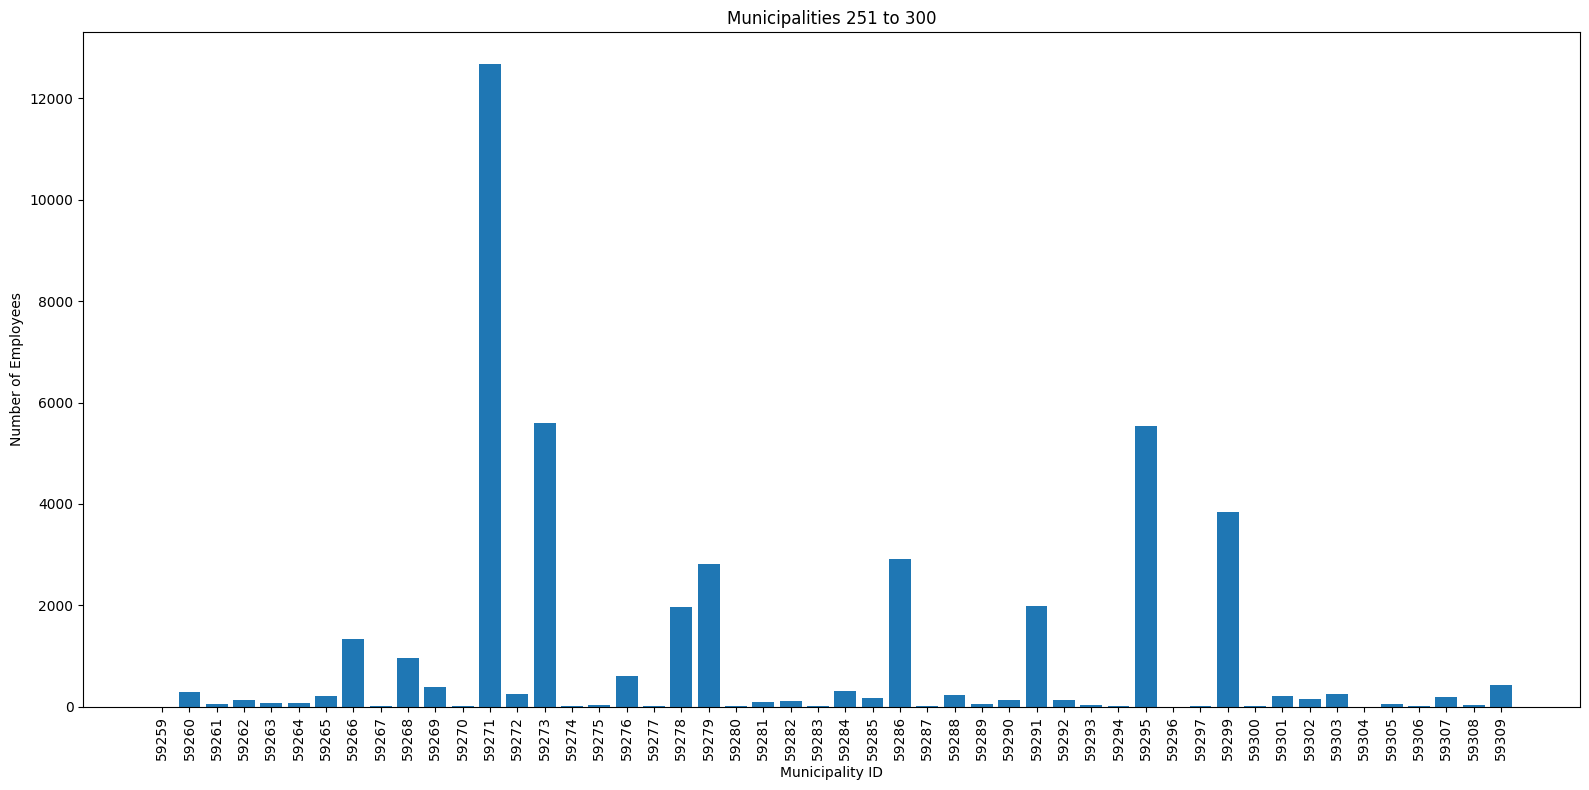

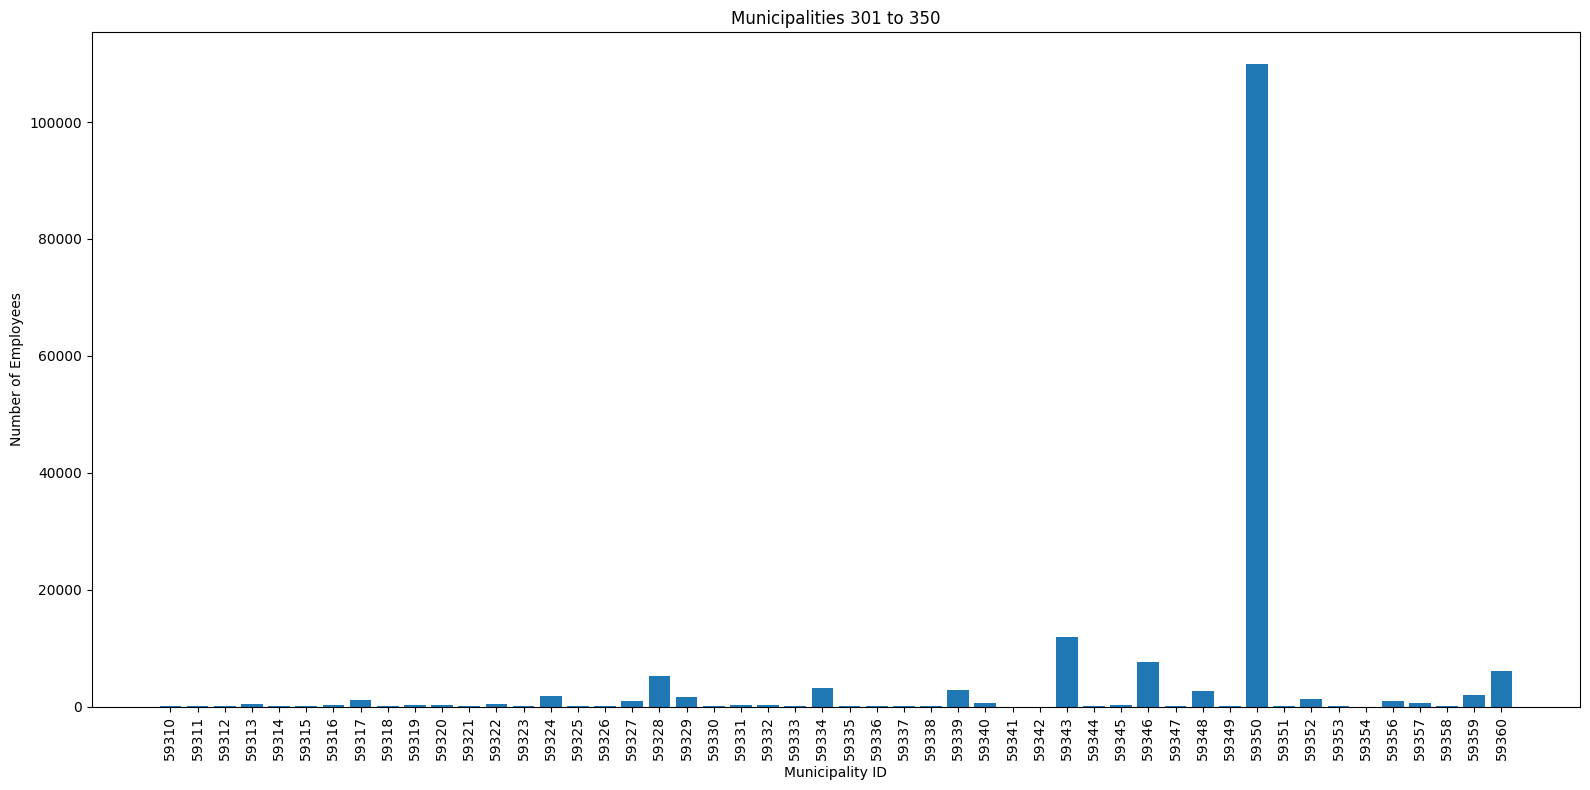

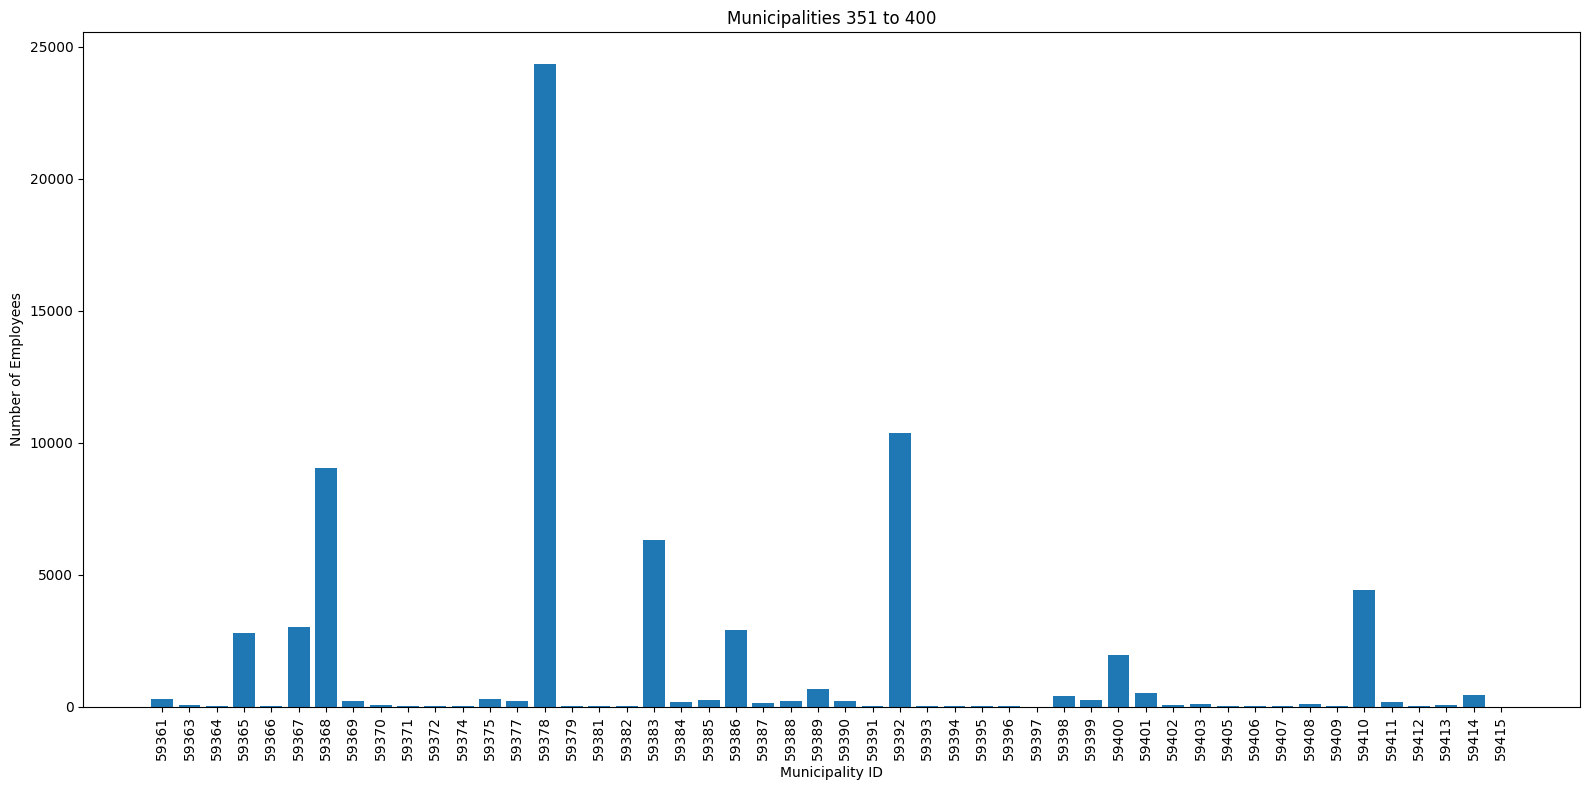

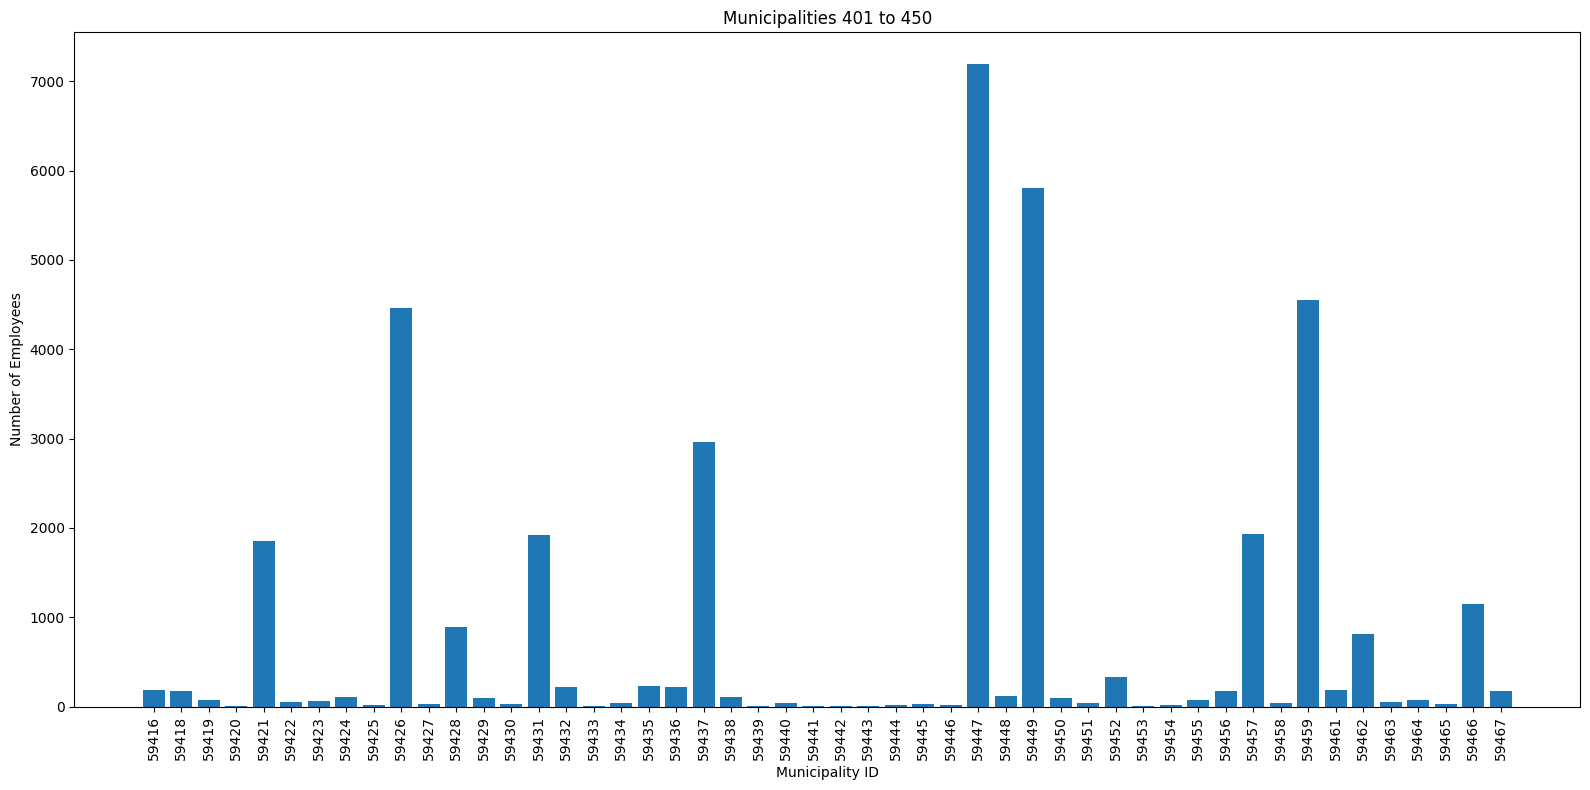

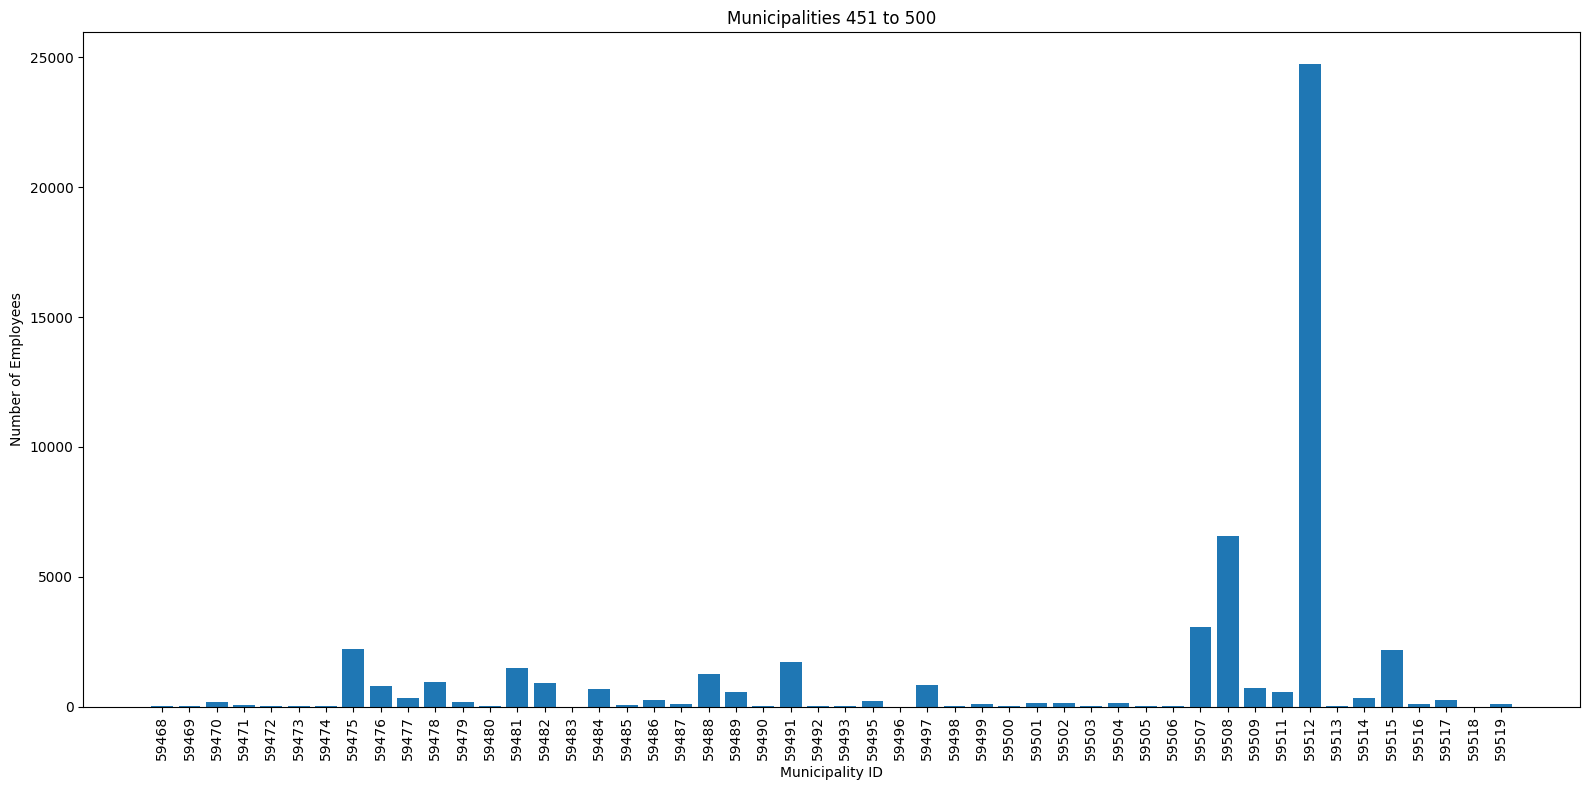

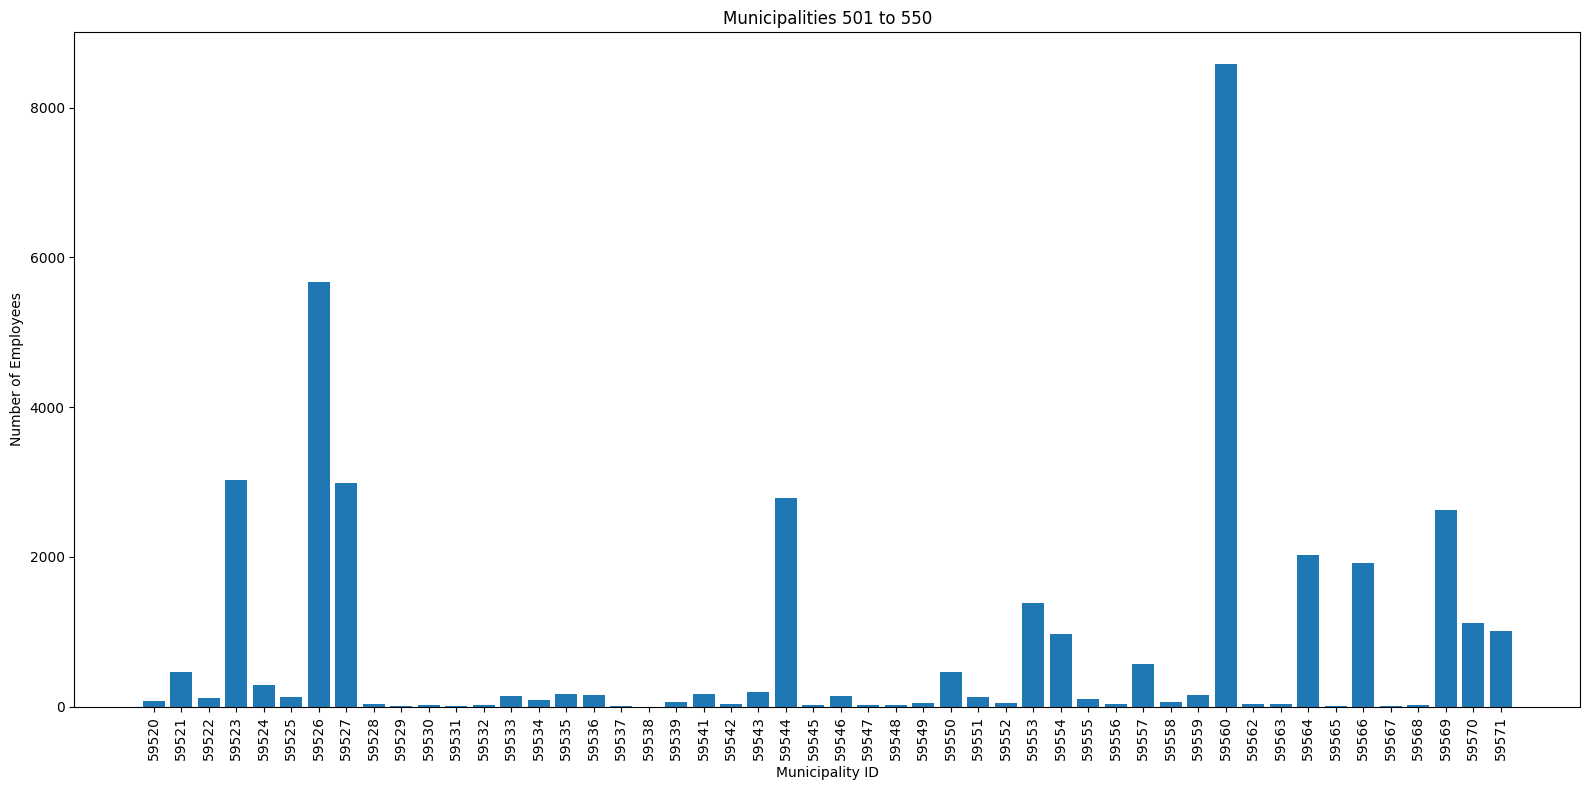

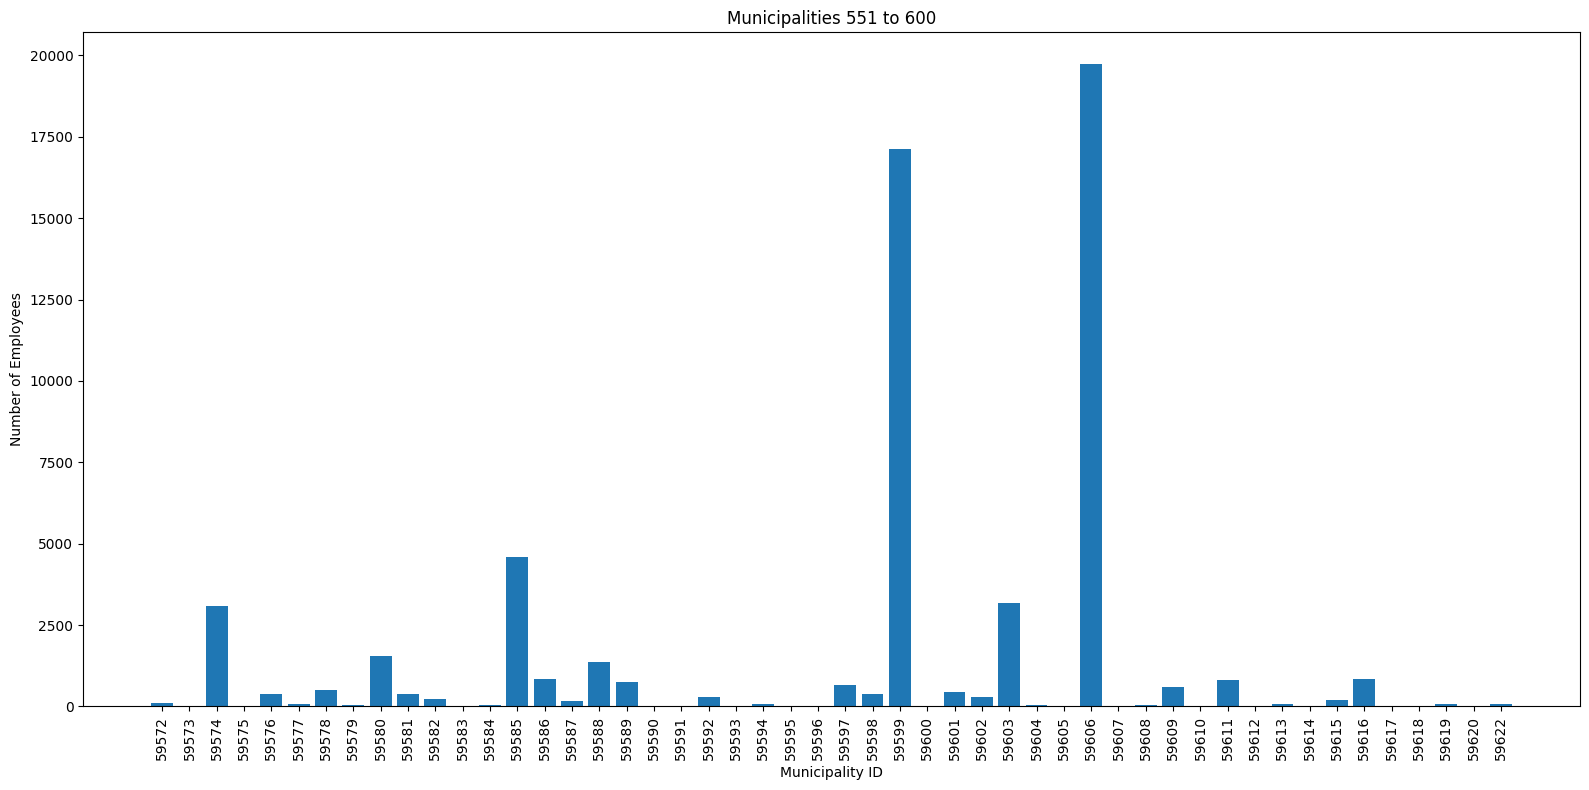

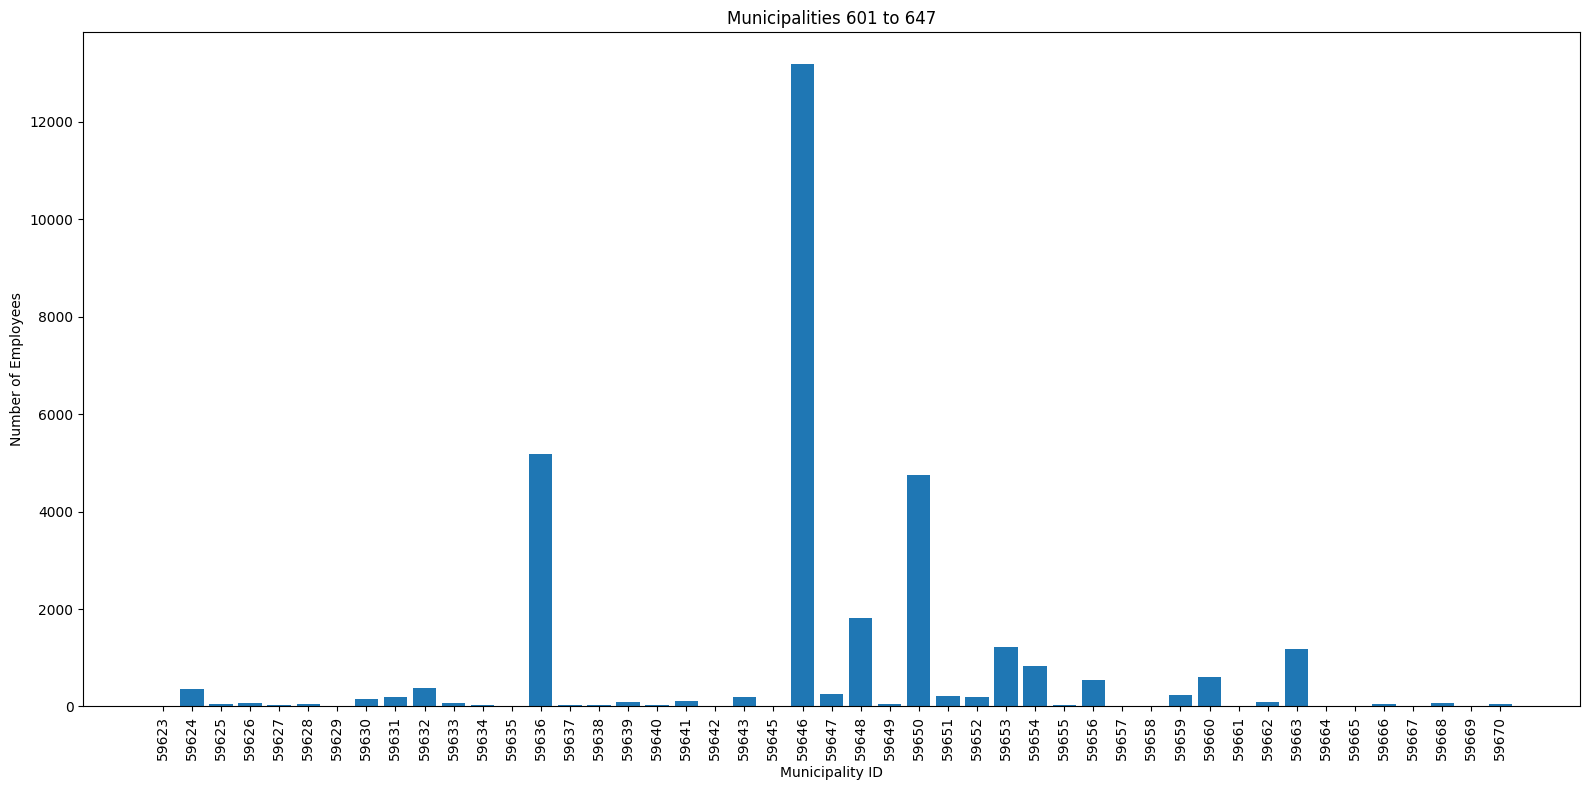

In [ ]:
chunk_size = 50
total_municipalities = len(df_employment)

num_chunks = math.ceil(total_municipalities / chunk_size)

for i in range(num_chunks):
    start_idx = i * chunk_size
    end_idx = start_idx + chunk_size
    subset = df_employment.iloc[start_idx:end_idx]

    fig, ax = plt.subplots(figsize=(16, 8))
    ax.bar(subset["municipality_id"], subset["employment"])

    ax.set_xlabel("Municipality ID")
    ax.set_ylabel("Number of Employees")
    ax.set_title(f"Municipalities {start_idx + 1} to {min(end_idx, total_municipalities)}")
    ax.tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

In [ ]:
# Merge df_working_by_municipality and df_employment
# df_merged = pd.merge(df_working_by_municipality, df_employment, on="municipality_id", how="left")
# df_merged = df_merged[['municipality_id', 'working_population', 'employment']]

df_merged = pd.merge(df_working_by_municipality, df_employment, on="municipality_id", how="left")
df_merged = df_merged[['municipality_id', 'working_population', 'employment']]

df_merged['difference'] = df_merged['working_population'] - df_merged['employment']
largest_outflow_municipality = df_merged.loc[df_merged['difference'].idxmin()]
largest_inflow_municipality = df_merged.loc[df_merged['difference'].idxmax()]

print(f"Largest net outflow: {largest_outflow_municipality['municipality_id']} ({largest_outflow_municipality['difference']:.0f})")
print(f"Largest net inflow: {largest_inflow_municipality['municipality_id']} ({largest_inflow_municipality['difference']:.0f})")

Largest net outflow: 59009 (-7001)
Largest net inflow: 59350 (63507)


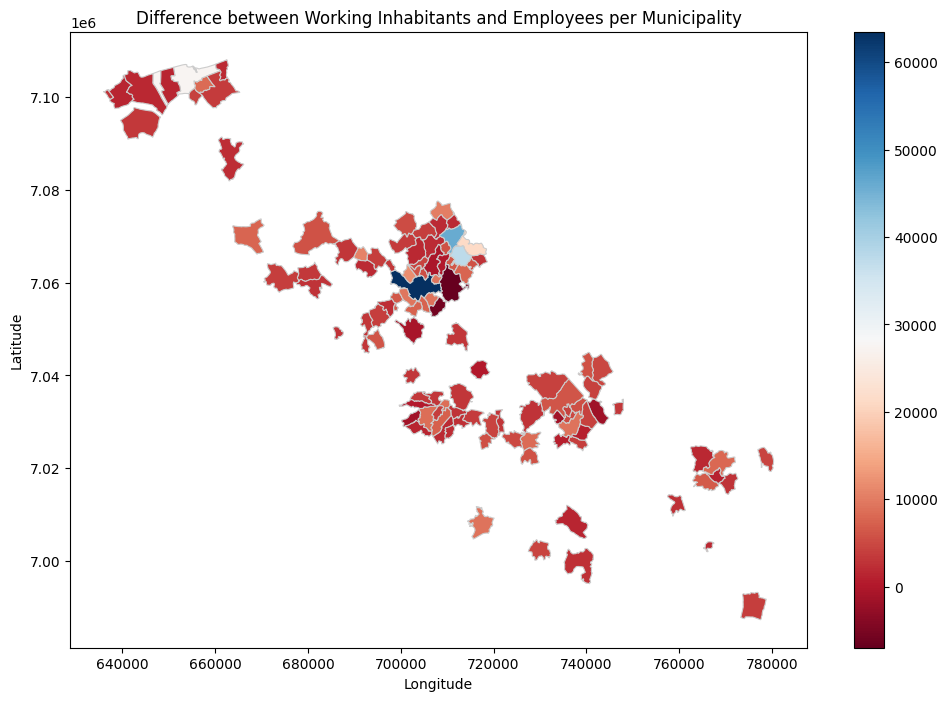

In [ ]:
merged_with_geometry = pd.merge(df_municipalities, df_merged, on='municipality_id', how='left')

# Create a GeoDataFrame for plotting
gdf = gpd.GeoDataFrame(merged_with_geometry, geometry='geometry')

# Plot the 'difference' column using a colormap
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf.plot(column='difference', cmap='RdBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Customize the plot
plt.title("Difference between Working Inhabitants and Employees per Municipality")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()

# 2

## 2.1

In [ ]:
columns = ["COM", "C19_POP15P"]
columns += ["C19_POP15P_CS{}".format(k) for k in range(1, 9)]

df_population = pd.read_csv("data/base-ic-evol-struct-pop-2019.CSV", sep = ";", usecols = columns, dtype = {
     "COM": str
})

renamed_columns = ["municipality_id", "population"]
renamed_columns += ["csp_{}".format(k) for k in range(1, 9)]

df_population.columns = renamed_columns

df_population = df_population.groupby("municipality_id").sum().reset_index()

df_population = df_population[df_population["municipality_id"].str.startswith("59")].reset_index(drop=True)

df_population.head()

,municipality_id,population,csp_1,csp_2,csp_3,csp_4,csp_5,csp_6,csp_7,csp_8
0,59001,370.793368,0.000000,25.315315,5.108173,91.270465,40.415117,60.808363,112.456766,35.419169
1,59002,3434.194765,0.000000,50.801698,147.324923,426.734261,619.780712,640.101391,934.751238,614.700542
2,59003,284.318424,0.000000,20.284176,10.136129,30.851961,51.116276,49.977074,82.531600,39.421207
3,59004,1129.527953,16.233788,70.092679,167.909612,167.681835,194.812410,92.431074,251.402543,168.964011
4,59005,2825.000000,10.000000,65.000000,250.000000,645.000000,485.000000,255.000000,630.000000,485.000000


In [ ]:
columns = { "COMMUNE": str, "ARM": str, "DCLT": str, "IPONDI": float, "TRANS": int }
df_commutes = pd.read_csv("data/FD_MOBPRO_2019.csv", dtype = columns, usecols = columns.keys(), sep = ";")

f = df_commutes["ARM"] != "ZZZZZ"
df_commutes.loc[f, "COMMUNE"] = df_commutes.loc[f, "ARM"]

df_commutes = df_commutes.rename(columns = {
    "COMMUNE": "origin_id", "DCLT": "destination_id", "IPONDI": "weight", "TRANS": "transport_mode"
})[["origin_id", "destination_id", "weight", "transport_mode"]]

df_commutes = df_commutes[df_commutes["origin_id"].str.startswith("59") &
                          df_commutes["destination_id"].str.startswith("59")].reset_index(drop=True)

df_commutes.head()

# df_iris_59

,origin_id,destination_id,weight,transport_mode
0,59001,59001,5.108173,5
1,59001,59001,5.108173,2
2,59001,59001,4.995677,1
3,59001,59001,4.995677,5
4,59001,59024,5.032897,5


In [ ]:
# Report how many trips have been generated in total

# total_trips = df_commutes['weight'].sum()
# total_trips

In [ ]:
municipalities = df_iris_59["municipality_id"].unique()
# municipalities
df_population = df_population.set_index("municipality_id").reindex(municipalities)
# df_population

df_origins = df_commutes.groupby("origin_id")["weight"].sum().reset_index()
df_origins = df_origins.set_index("origin_id").reindex(municipalities)
# df_origins
df_population

,population,csp_1,csp_2,csp_3,csp_4,csp_5,csp_6,csp_7,csp_8
municipality_id,,,,,,,,,
59225,5366.300982,10.034586,150.927950,211.442336,755.151199,916.250121,926.318804,1349.169378,1047.006609
59102,335.000000,10.000000,5.000000,0.000000,50.000000,65.000000,45.000000,130.000000,30.000000
59017,19794.318454,0.000000,342.978325,1001.307822,2520.260669,3807.814632,3286.843611,4826.920564,4008.192830
59532,232.746161,5.267270,14.461666,25.943042,51.551534,40.018741,39.829154,31.611248,24.063506
59616,8442.503034,11.312894,101.497859,260.725971,885.551007,1358.735086,1576.682678,1998.530674,2249.466865
...,...,...,...,...,...,...,...,...,...
59577,514.515277,29.679623,10.010972,20.602214,73.367835,112.061319,112.655627,97.719160,58.418526
59093,291.471090,5.100711,9.913135,19.897825,45.473966,69.619951,29.816081,71.559316,40.090105
59091,425.533192,9.816010,34.917349,55.341698,44.999514,64.957406,79.847449,86.244318,49.409447


In [ ]:
X = df_population.reindex(municipalities).values[:,1:]
# X
y = df_origins.reindex(municipalities)["weight"].values

# Set up the sklearn model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
coefficients = model.coef_
intercept = model.intercept_

print(f"beta0 = {intercept:.3f}")

for i, coef in enumerate(coefficients):
    print(f"beta{i+1} = {coef:.3f}")

beta0 = 4.136
beta1 = 1.391
beta2 = 1.349
beta3 = 0.733
beta4 = 0.983
beta5 = 1.035
beta6 = 0.308
beta7 = 0.026
beta8 = -0.144


In [ ]:
# coefficients = model.coef_
# intercept = model.intercept_

# prediction = model.predict(X)

prediction = np.maximum(np.sum(intercept + X * coefficients[np.newaxis, :], axis = 1), 0.0)
# prediction

total_trips = np.sum(prediction)
total_trips

# plt.plot(y, prediction, "x")
# plt.plot([0, 100000], [0, 100000], "k--")
# plt.xlabel("Reference")
# plt.ylabel("Model")

908584.4554808204

In [ ]:
X
# df_test = pd.DataFrame({
#     "work": X,
#     "n_commuters": prediction
# })
# df_test

array([[  10.03458611,  150.9279501 ,  211.44233559, ...,  926.31880354,
        1349.16937819, 1047.00660916],
       [  10.        ,    5.        ,    0.        , ...,   45.        ,
         130.        ,   30.        ],
       [   0.        ,  342.97832534, 1001.30782194, ..., 3286.84361144,
        4826.92056435, 4008.19282956],
       ...,
       [   9.81601006,   34.91734897,   55.34169775, ...,   79.84744923,
          86.24431804,   49.40944746],
       [  20.19661502,   45.35588298,   75.52927034, ...,  302.68016205,
         522.31182128,  267.8010024 ],
       [  15.04443988,   20.55778694,   15.31604857, ...,   86.55103373,
         121.09570253,   55.47531991]])

In [ ]:
df_prediction = pd.DataFrame({
    "municipality_id": municipalities,
    "n_commuters": prediction
})

df_prediction.head()

,municipality_id,n_commuters
0,59225,2266.199707
1,59102,183.122833
2,59017,8210.057244
3,59532,180.651015
4,59616,2867.842649


In [ ]:
df_csp_population = df_population[['csp_1', 'csp_2', 'csp_3', 'csp_4', 'csp_5', 'csp_6', 'csp_7', 'csp_8']].sum().reset_index()
# df_csp_population
X_csp = df_csp_population.values.reshape(1, -1)  # Reshape to a 2D array
X_csp
# trips_per_csp = np.maximum(0, np.dot(X_csp, coefficients) + intercept)

array([['csp_1', 6082.217161514134, 'csp_2', 52486.61567980709, 'csp_3',
        181321.0464319383, 'csp_4', 293003.5267054904, 'csp_5',
        338062.56967802, 'csp_6', 284362.9165523798, 'csp_7',
        502161.6841133974, 'csp_8', 442428.9109189566]], dtype=object)

In [ ]:
csp_data = []
for i in range(8):  # Loop through all 8 SPCs
    X_csp = np.zeros(8)  # Initialize all SPC populations to 0
    X_csp[i] = df_population[f'csp_{i+1}'].sum()  # Set the target SPC population to its total value
    csp_data.append(X_csp)

# csp_data
trips_per_csp = []
for X_csp in csp_data:
    trips = np.maximum(0, np.dot(X_csp, coefficients) + intercept)  # Apply the model
    trips_per_csp.append(trips)

In [ ]:
trips_per_csp

[8465.537906136335,
 70824.04407228052,
 132850.98977432481,
 288008.4711227016,
 349947.54948740726,
 87449.08773942465,
 13227.947539075642,
 0.0]

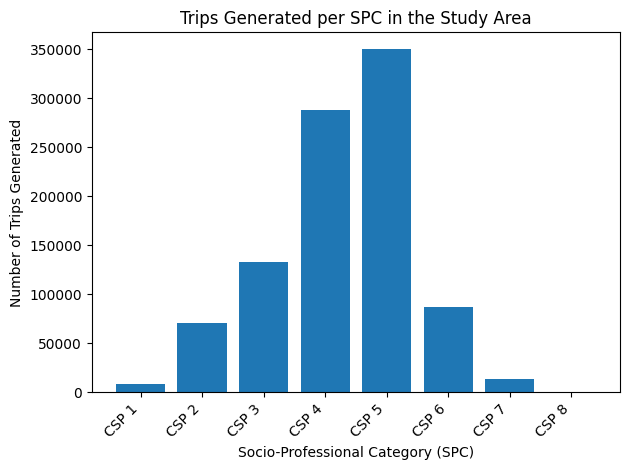

In [ ]:
csp_labels = ['CSP 1', 'CSP 2', 'CSP 3', 'CSP 4', 'CSP 5', 'CSP 6', 'CSP 7', 'CSP 8']  # Replace with your actual labels
plt.bar(csp_labels, trips_per_csp)
plt.xlabel("Socio-Professional Category (SPC)")
plt.ylabel("Number of Trips Generated")
plt.title("Trips Generated per SPC in the Study Area")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
# 2.1 b
df_iris_population = pd.read_csv("data/base-ic-evol-struct-pop-2019.CSV", sep = ";", dtype = {
    "IRIS": "str"
}, usecols = ["IRIS"] + ["C19_POP15P_CS{}".format(k) for k in range(1,9)])

for k in range(1, 9):
    df_iris_population["csp_{}".format(k)] = df_iris_population["C19_POP15P_CS{}".format(k)]
df_iris_population = df_iris_population[["IRIS"] + ["csp_{}".format(k) for k in range(1,9)]]
df_iris_population.columns = ["iris_id"] + ["csp_{}".format(k) for k in range(1,9)]
df_iris_population = df_iris_population.groupby("iris_id").sum().reset_index()

df_test = pd.merge(df_iris_59, df_iris_population, on = "iris_id", how = "left")
# df_test.head()
# df_iris_59

In [ ]:
X_iris = df_test[['csp_1', 'csp_2', 'csp_3', 'csp_4', 'csp_5', 'csp_6', 'csp_7', 'csp_8']].values

iris_predictions = model.predict(X_iris)

df_test['predicted_commuters'] = iris_predictions

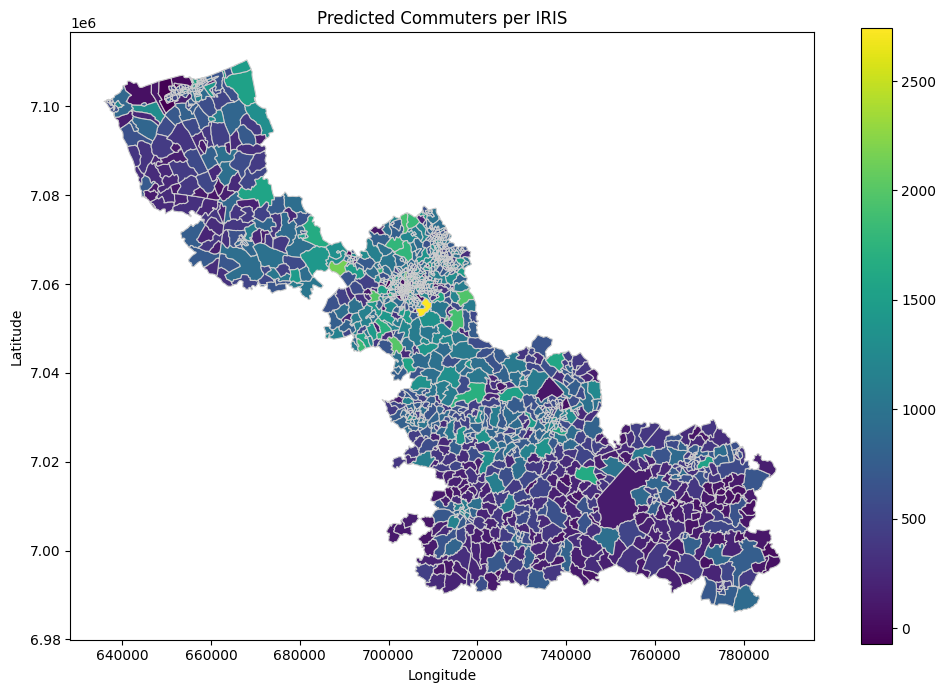

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
df_test.plot(column='predicted_commuters', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Customize the plot
plt.title("Predicted Commuters per IRIS")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()

## 2.2

In [ ]:
# Calculate N for each municipality

# TODO: Verificar se municiplity 59494 realmemente nao tem dados sobre employment

df_employment_municipality = df_employment.set_index("municipality_id").reindex(municipalities)
df_employment_municipality["employment"] = df_employment_municipality["employment"].fillna(0)
N = np.minimum(0.7 * df_employment_municipality["employment"].values, 0.7 * df_prediction["n_commuters"].values)

# Calculate Dj for each municipality
Dj = (df_employment_municipality["employment"].values / np.sum(df_employment_municipality["employment"].values)) * np.sum(N)

# Create a DataFrame to store the results
df_arriving_trips = pd.DataFrame({'municipality_id': municipalities, 'trips_arriving': Dj})
df_arriving_trips

,municipality_id,trips_arriving
0,59225,1339.904806
1,59102,3.268061
2,59017,2620.439846
3,59532,9.804182
4,59616,466.787975
...,...,...
643,59577,49.020908
644,59093,22.876424
645,59091,169.939146
646,59631,108.390673


In [ ]:
# Create a copy of df_arriving_trips for sorting
df_arriving_trips_sorted = df_arriving_trips.copy()

# Sort the new DataFrame by 'trips_arriving' in descending order
df_arriving_trips_sorted = df_arriving_trips_sorted.sort_values(by='trips_arriving', ascending=False)
df_arriving_trips_sorted.head(10)

,municipality_id,trips_arriving
10,59350,59833.830387
59,59009,26957.141732
32,59183,14280.335042
20,59512,13470.945391
79,59378,13249.806631
29,59606,10743.204225
37,59178,9422.907782
35,59599,9330.857411
86,59646,7179.384247
25,59271,6902.143781


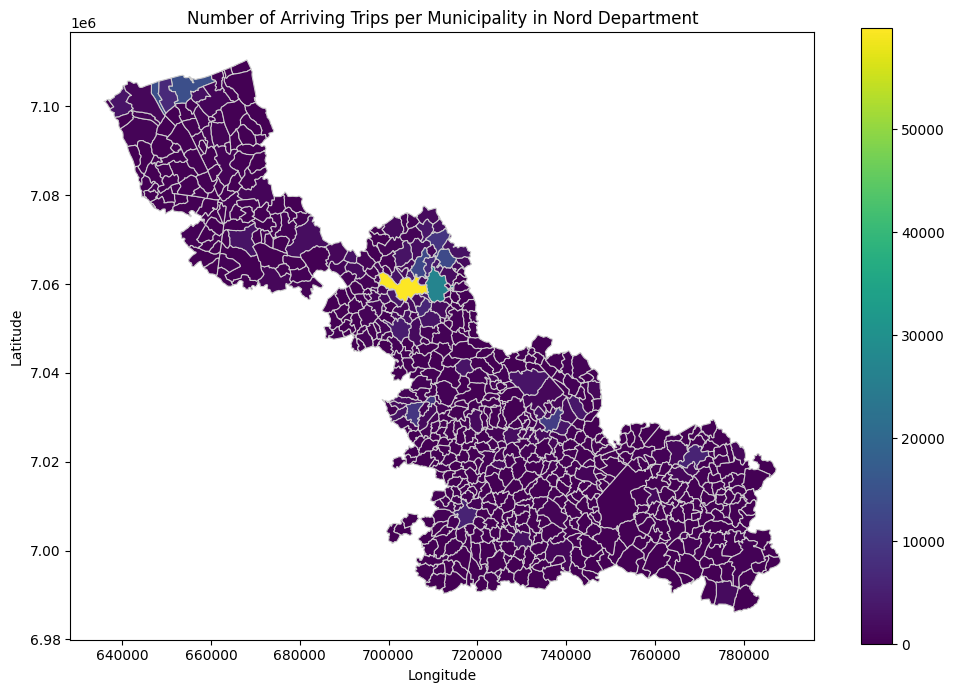

Report on the value of N:
N represents the minimum between 70% of the number of employees in a municipality and 70% of the number of trips generated from that municipality. This value is used to estimate arriving trips to each municipality, making it an important parameter for estimating the distribution of work trips.  The chosen value of N is a conservative estimate to ensure that generated trips do not exceed employment numbers or trip origins. The choice of 70% is arbitrary, but intended to avoid overestimation of the traffic within the city


In [ ]:
# Merge with geographical data
# TODO: df_iris_59 idk man
df_map_arriving_trips = pd.merge(df_municipalities, df_arriving_trips, on="municipality_id", how='left')

# Convert to GeoDataFrame
gdf_arriving_trips = gpd.GeoDataFrame(df_map_arriving_trips, geometry="geometry")

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf_arriving_trips.plot(column="trips_arriving", cmap="viridis", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)

# Customize the plot
plt.title("Number of Arriving Trips per Municipality in Nord Department")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()

print("Report on the value of N:")
print("N represents the minimum between 70% of the number of employees in a municipality and 70% of the number of trips generated from that municipality. This value is used to estimate arriving trips to each municipality, making it an important parameter for estimating the distribution of work trips.  The chosen value of N is a conservative estimate to ensure that generated trips do not exceed employment numbers or trip origins. The choice of 70% is arbitrary, but intended to avoid overestimation of the traffic within the city")

In [ ]:
# In preparation for the next task, proportionately scale your demand per zone (Oi ) from Exercise 2.1 so that the total is the same as the number of trips N.
# In a balanced model, the number of originating flows must match the number of arriving flows over all zones. For that, scale your demand as follows:

# Calculate the scaling factor
scaling_factor = total_trips / df_arriving_trips["trips_arriving"].sum()

# print(scaling_factor)

# Scale the demand proportionally

df_arriving_trips["scaled"] = df_arriving_trips["trips_arriving"] * scaling_factor

# Now df_origins['scaled_weight'] contains the proportionately scaled demand (O'i)
# and sums to the total number of trips N.

# print(df_origins["scaled"].sum())
df_arriving_trips
print(scaling_factor)
print(df_arriving_trips["trips_arriving"].sum())
print(df_arriving_trips["scaled"].sum())

2.28921213281117
396898.32255304
908584.4554808204


## 2.3

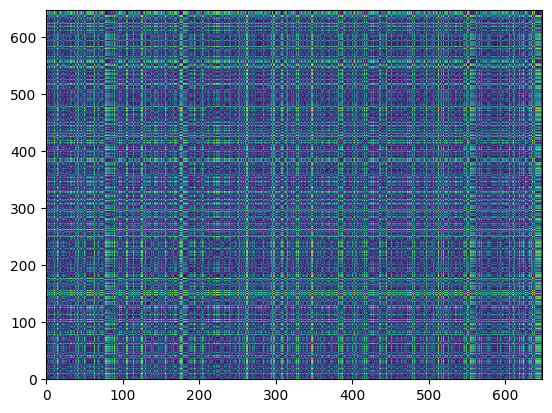

In [ ]:
# First, calculate the distance matrix Dij between the centroids of the municipalities in the study area. You may use the code developed during the course.
# Next, calculate the friction matrix ij based on Dij.
# Initialize the vectors pi and aj to 1 and run the formulas iteratively until the values stabilize.
# Calculate the resulting flow using the given formula

# Dissolve the IRIS geometries by municipality to get municipality geometries
# df_municipalities = df_iris_59.dissolve(by="municipality_id")
centroids = df_municipalities["geometry"].centroid
centroids = np.array([centroids.x, centroids.y] ).T

# Show the distance matrix as a table or in a plot.
distance_matrix = np.zeros((len(municipalities), len(municipalities)))
for k in range(len(municipalities)):
    distance_matrix[k,:] = la.norm(centroids[k] - centroids, axis = 1)
plt.pcolor(distance_matrix)

In [ ]:
# Next, calculate the friction matrix ij based on Dij.

beta = -1.1e-4  # Given in the problem
alpha = -0.4    # Given in the problem

# Compute the friction matrix
friction_matrix = np.exp(beta * distance_matrix + alpha)


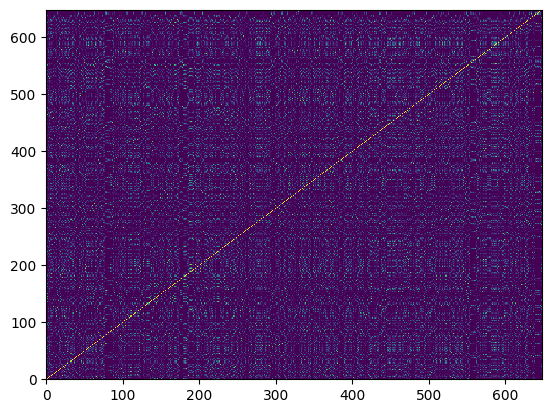

In [ ]:
# friction_matrix
plt.pcolor(friction_matrix)

In [ ]:
import pandas as pd

# Values obtained from your calculations
origins = df_prediction["n_commuters"].values  # Origin trips (O_i)
destinations = df_arriving_trips["scaled"].values  # Destination trips (D_j)

# Create the table as a DataFrame
table_3 = pd.DataFrame({
    # "Zone": range(1, len(origins) + 1),  # Zone indices
    "Zone": municipalities,
    "Origins (O_i)": origins,
    "Destinations (D_j)": destinations
})

# Display the table
print(table_3)


      Zone  Origins (O_i)  Destinations (D_j)
0    59225    2266.199707         3067.326339
1    59102     183.122833            7.481284
2    59017    8210.057244         5998.742689
3    59532     180.651015           22.443851
4    59616    2867.842649         1068.576696
..     ...            ...                 ...
643  59577     319.910316          112.219256
644  59093     190.189568           52.368986
645  59091     265.595284          389.026755
646  59631     718.444606          248.129244
647  59657     313.258023           23.690732

[648 rows x 3 columns]


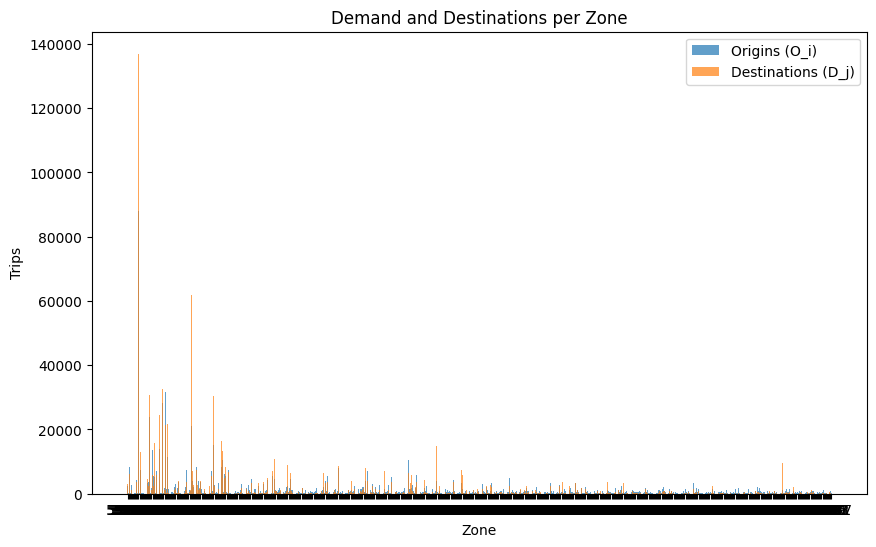

In [ ]:
import matplotlib.pyplot as plt

# Plot origins and destinations
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(table_3["Zone"], table_3["Origins (O_i)"], label="Origins (O_i)", alpha=0.7)
ax.bar(table_3["Zone"], table_3["Destinations (D_j)"], label="Destinations (D_j)", alpha=0.7)
ax.set_xlabel("Zone")
ax.set_ylabel("Trips")
ax.set_title("Demand and Destinations per Zone")
ax.legend()
plt.show()


In [ ]:
origins = df_prediction["n_commuters"].values  # Origin trips (O_i)
destinations = df_arriving_trips["scaled"].values  # Destination trips (D_j)
friction_matrix = np.exp(beta * distance_matrix + alpha)  # Friction matrix ρ_ij

# Initialization
p = np.ones(len(origins))  # p_i initialized to 1
a = np.ones(len(destinations))  # a_j initialized to 1

# Iterative computation
tolerance = 1e-6  # Convergence tolerance
max_iterations = 1000  # To prevent infinite loops
for iteration in range(max_iterations):
    # Update p_i
    p_new = origins / np.sum(a[np.newaxis, :] * friction_matrix, axis=1)

    # Update a_j
    a_new = destinations / np.sum(p_new[:, np.newaxis] * friction_matrix, axis=0)

    # Check for convergence
    if np.max(np.abs(p - p_new)) < tolerance and np.max(np.abs(a - a_new)) < tolerance:
        print(f"Converged after {iteration + 1} iterations.")
        break

    # Update p and a for the next iteration
    p, a = p_new, a_new
else:
    print("Warning: Did not converge within the maximum number of iterations.")

# # Final weights
# print("Final p_i:", p)
# print("Final a_j:", a)

Converged after 240 iterations.


In [ ]:
import numpy as np

# Distance matrix (already computed in your code)
distance_matrix = np.array(distance_matrix)  # Replace with your actual matrix if needed

# Convert to a DataFrame for visualization
table_4 = pd.DataFrame(
    distance_matrix,
    columns=[f"Zone {j+1}" for j in range(distance_matrix.shape[1])],
    index=[f"Zone {i+1}" for i in range(distance_matrix.shape[0])]
)

# Display the table
print(table_4)


                 Zone 1         Zone 2         Zone 3        Zone 4  \
Zone 1         0.000000   11965.994395   63441.523716  29866.513931   
Zone 2     11965.994395       0.000000   57910.545048  18964.224062   
Zone 3     63441.523716   57910.545048       0.000000  63564.794371   
Zone 4     29866.513931   18964.224062   63564.794371      0.000000   
Zone 5     38613.898150   34433.389961   88631.007520  25809.392579   
...                 ...            ...            ...           ...   
Zone 644   92746.401124   89612.207611  141410.776373  78067.089650   
Zone 645   84981.628603   81855.148897  134002.193442  70558.234388   
Zone 646  105344.259371  100131.256010  146816.179942  85576.736353   
Zone 647   83204.200454   80772.363533  134090.369716  70528.043383   
Zone 648   40078.320779   36382.654054   90918.367282  28162.527791   

                Zone 5         Zone 6        Zone 7        Zone 8  \
Zone 1    38613.898150   37927.288537  18978.078460  10983.645965   
Zone 2   

In [ ]:
# Compute the flow matrix F_ij
flow_matrix = np.outer(p, a) * friction_matrix

# Validation
row_sums = flow_matrix.sum(axis=1)  # Sum over rows for origins
col_sums = flow_matrix.sum(axis=0)  # Sum over columns for destinations

# print("Row sums (Origin flows):", row_sums)
# print("Column sums (Destination flows):", col_sums)

# # Check if the sums are close to the original inputs
# print("Difference in origins:", np.abs(origins - row_sums).max())
# print("Difference in destinations:", np.abs(destinations - col_sums).max())

In [ ]:
# Flow matrix (already computed in your code)
flow_matrix = np.array(flow_matrix)  # Replace with your actual matrix if needed

# Convert to a DataFrame for visualization
table_5 = pd.DataFrame(
    flow_matrix,
    columns=[f"Zone {j+1}" for j in range(flow_matrix.shape[1])],
    index=[f"Zone {i+1}" for i in range(flow_matrix.shape[0])]
)

# table_5 = pd.DataFrame(
#     flow_matrix,
#     columns=municipalities,
#     index=municipalities
# )

# Display the table
print(table_5)
# municipalities

              Zone 1        Zone 2        Zone 3    Zone 4     Zone 5  \
Zone 1    112.025732  6.642919e-02  1.129082e-01  0.049071   0.958366   
Zone 2      2.348579  1.937023e-02  1.622129e-02  0.012729   0.118680   
Zone 3      1.052179  4.275659e-03  1.221812e+03  0.012148   0.039411   
Zone 4      0.322205  2.363994e-03  8.559457e-03  0.100746   0.301192   
Zone 5      0.488689  1.711713e-03  2.156537e-03  0.023390  20.445757   
...              ...           ...           ...       ...        ...   
Zone 644    0.000116  3.636489e-07  5.965085e-07  0.000007   0.004344   
Zone 645    0.000192  5.990493e-07  9.456912e-07  0.000011   0.007155   
Zone 646    0.000070  2.727679e-07  7.852692e-07  0.000007   0.002908   
Zone 647    0.001018  2.940933e-06  4.081618e-06  0.000048   0.034635   
Zone 648    0.045661  1.516281e-04  1.840577e-04  0.001982   1.732107   

                Zone 6    Zone 7    Zone 8     Zone 9   Zone 10  ...  \
Zone 1    1.056824e-03  0.029838  0.335627   2.2544

In [ ]:
# Document the 10 pairs of municipalities with the largest flows and name them.

# Assuming 'flow_matrix' and 'municipalities' are defined as in your provided code.

# Convert the flow matrix to a DataFrame for easier handling
flow_df = pd.DataFrame(flow_matrix, index=municipalities, columns=municipalities)
flow_df
# Convert the flow_matrix into a Series with multi-index
flow_series = flow_df.stack()

# Sort the Series by flow values in descending order
flow_series_sorted = flow_series.sort_values(ascending=False)

# Get the top 10 pairs of municipalities with the largest flows
top_10_flows = flow_series_sorted.head(10)

# Print the documentation of the 10 pairs of municipalities
print("10 Pairs of Municipalities with the Largest Flows:")
for (origin, destination), flow in top_10_flows.items():
    print(f"- {origin} to {destination}: {flow:.2f}")

10 Pairs of Municipalities with the Largest Flows:
- 59350 to 59350: 65223.19
- 59183 to 59183: 12421.35
- 59009 to 59009: 10420.81
- 59512 to 59350: 9946.49
- 59378 to 59378: 7236.77
- 59599 to 59599: 6248.92
- 59512 to 59512: 6247.63
- 59599 to 59009: 5963.10
- 59650 to 59350: 5210.43
- 59350 to 59512: 4886.52


# 3

## 3.1

In [ ]:
# Disaggregation
# new_flow_df = flow_df.copy()
# new_flow_df
# Normalize the flow matrix to create a probability matrix
probability_matrix = flow_matrix / flow_matrix.sum()
probability_matrix

array([[1.23296994e-04, 7.31128380e-08, 1.24268294e-07, ...,
        1.93752941e-09, 7.21624682e-09, 2.11524486e-08],
       [2.58487685e-06, 2.13191254e-08, 1.78533607e-08, ...,
        2.68792721e-10, 7.37254791e-10, 2.48337925e-09],
       [1.15804206e-06, 4.70584652e-09, 1.34474206e-03, ...,
        2.03967354e-10, 2.69700995e-10, 7.94575580e-10],
       ...,
       [7.65076590e-11, 3.00211897e-13, 8.64277642e-13, ...,
        1.39667529e-05, 1.56367786e-07, 8.80202375e-11],
       [1.12010795e-09, 3.23682998e-12, 4.49228245e-12, ...,
        6.14665979e-07, 5.83910516e-06, 1.12541224e-09],
       [5.02548645e-08, 1.66883842e-10, 2.02576320e-10, ...,
        5.29594401e-09, 1.72258474e-08, 5.81916739e-08]])

In [ ]:
# Number of trips to generate
num_trips = 10000

# Flatten the probability matrix for sampling
flattened_probs = probability_matrix.flatten()
origin_destination_pairs = np.arange(len(flattened_probs))  # Flattened index for all (i, j) pairs

# Sample trips based on probabilities
# chosen_pairs = np.random.choice(origin_destination_pairs, size=num_trips, p=flattened_probs)

chosen_pairs_indices = np.random.choice(
    origin_destination_pairs, size=num_trips, p=flattened_probs
)
origins, destinations = np.unravel_index(chosen_pairs_indices, flow_matrix.shape)
origin_municipalities = [municipalities[i] for i in origins]
destination_municipalities = [municipalities[j] for j in destinations]

trip_data = pd.DataFrame({
    'origin_id': origin_municipalities,
    'destination_id': destination_municipalities
})
# trip_data

In [ ]:
df_new_municipalities=df_municipalities.copy()
df_new_municipalities = df_new_municipalities.drop(columns=['iris_id'])
df_new_municipalities = df_new_municipalities.reset_index()
df_new_municipalities

,municipality_id,geometry
0,59001,"POLYGON ((716637.6 7015968.5, 716638.9 7015945..."
1,59002,"POLYGON ((722037.1 7024286.7, 721939.7 7024193..."
2,59003,"POLYGON ((775835.4 7013891.3, 775825.7 7013914..."
3,59004,"POLYGON ((723362.9 7045729.1, 723364.8 7045722..."
4,59005,"POLYGON ((696481.4 7051180, 696510.1 7051106.7..."
...,...,...
643,59666,"POLYGON ((657129.4 7084560.2, 657052.6 7084727..."
644,59667,"POLYGON ((663006.2 7081905.2, 663008.1 7081900..."
645,59668,"POLYGON ((665080.1 7107281.1, 664781.7 7107235..."
646,59669,"POLYGON ((658684.1 7079317.2, 658708.4 7079308..."


(array([  10.,  110.,  579., 1710., 2833., 2688., 1479.,  487.,   97.,
           7.]),
 array([ 4.25989936,  5.01407545,  5.76825153,  6.52242762,  7.2766037 ,
         8.03077979,  8.78495587,  9.53913196, 10.29330804, 11.04748413,
        11.80166021]),
 <BarContainer object of 10 artists>)

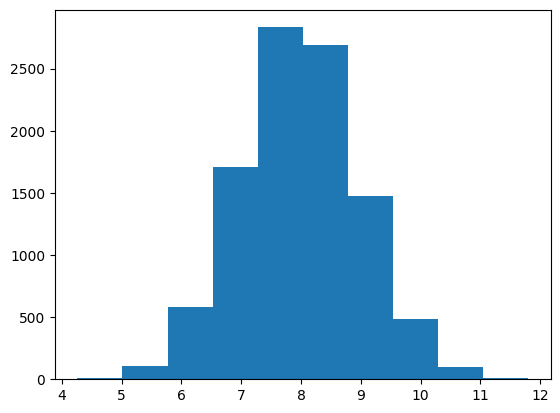

In [ ]:
np.random.seed(0)
departure_times= np.maximum(0.0, (8 + np.random.normal(size = num_trips)) * 3600)
plt.hist(departure_times / 3600)

In [ ]:
trip_data['departure_time'] = departure_times
trip_data

,origin_id,destination_id,departure_time
0,59367,59428,35150.588445
1,59183,59544,30240.565950
2,59368,59234,32323.456743
3,59360,59360,36867.215517
4,59178,59459,35523.208765
...,...,...,...
9995,59079,59383,22286.585916
9996,59009,59571,28952.491731
9997,59152,59359,30660.739844
9998,59350,59350,28681.485505


In [ ]:
# df_trips = trip_data.copy()
df_trips = pd.merge(trip_data, df_new_municipalities.rename(columns={
    "municipality_id": "origin_id",
    "geometry": "origin_geometry"
}), on="origin_id", how="left")

df_trips = pd.merge(df_trips, df_new_municipalities.rename(columns={
    "municipality_id": "destination_id",
    "geometry": "destination_geometry"
}), on="destination_id", how="left")

In [ ]:
df_trips = gpd.GeoDataFrame(df_trips, geometry = "origin_geometry", crs = df_municipalities.crs)
df_trips["origin_geometry"] = df_trips.sample_points(1)
df_trips = gpd.GeoDataFrame(df_trips, geometry = "destination_geometry", crs = df_municipalities.crs)
df_trips["destination_geometry"] = df_trips.sample_points(1)

In [ ]:
df_trips.columns

Index(['origin_id', 'destination_id', 'departure_time', 'origin_geometry',
       'destination_geometry'],
      dtype='object')

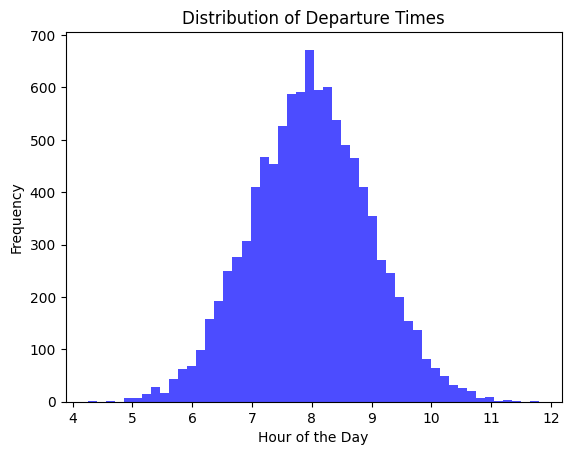

In [ ]:
# Histogram
plt.hist(departure_times / 3600, bins=50, color='blue', alpha=0.7)
plt.title("Distribution of Departure Times")
plt.xlabel("Hour of the Day")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# fig, ax = plt.subplots(figsize=(12, 8))

# # Plot the municipality boundaries (optional, for context)
# df_municipalities.plot(ax=ax, color='lightgray', edgecolor='gray')

# # Iterate through the trips and plot lines
# for index, row in df_trips.iterrows():
#     origin_point = row['origin_geometry']
#     destination_point = row['destination_geometry']

#     # Create a line between the origin and destination
#     line = plt.Line2D(
#         [origin_point.x, destination_point.x],
#         [origin_point.y, destination_point.y],
#         color='blue', linewidth=0.5, alpha=0.5  # Adjust color, width, and transparency as needed
#     )
#     ax.add_line(line)

# # Customize the plot (add title, labels, etc.)
# ax.set_title("Generated Trips")
# ax.set_xlabel("Longitude")
# ax.set_ylabel("Latitude")

# # Show the plot
# plt.show()

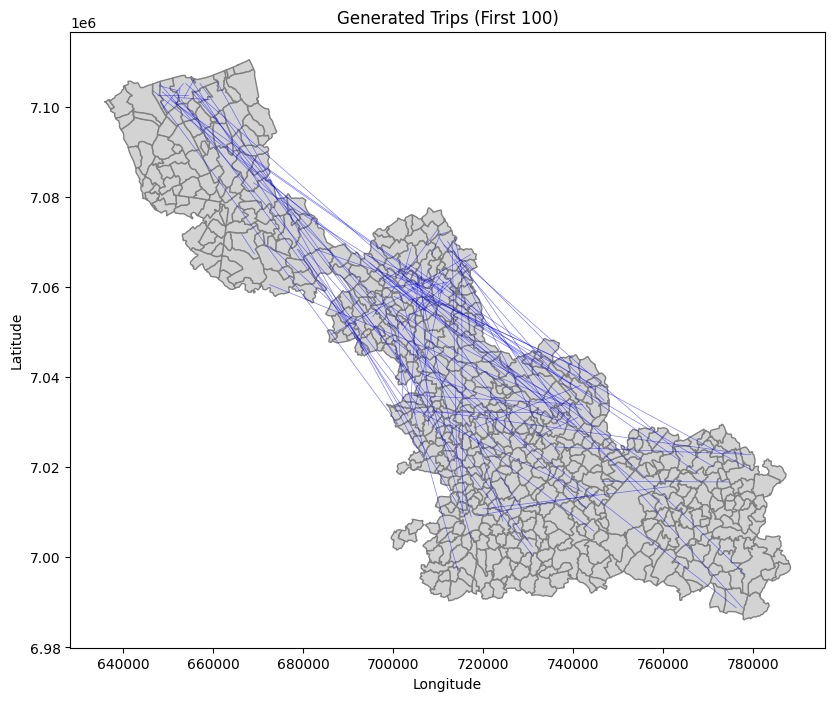

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the municipality boundaries (optional, for context)
df_municipalities.plot(ax=ax, color='lightgray', edgecolor='gray')

# Iterate through the first 1000 trips and plot lines
for index, row in df_trips.head(100).iterrows():  # Limit to first 1000 trips
    origin_point = row['origin_geometry']
    destination_point = row['destination_geometry']

    # Create a line between the origin and destination
    line = plt.Line2D(
        [origin_point.x, destination_point.x],
        [origin_point.y, destination_point.y],
        color='blue', linewidth=0.5, alpha=0.5
    )
    ax.add_line(line)

# Customize the plot (add title, labels, etc.)
ax.set_title("Generated Trips (First 100)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the plot
plt.show()

In [ ]:
df_trips.to_parquet("data/trips.parquet")

## 3.2

In [ ]:
# Routing
# Está noutro notebook pq é computacionalmente intensivo